In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [38]:
# Tạo kết nối SQLite
conn = sqlite3.connect(":memory:")

In [39]:
df = pd.read_csv('C:\\Users\\ADMIN\\Repo\\Data_analysis\\final_data.csv')
df.head()

sbd  toan  ngu_van  ngoai_ngu  vat_ly  hoa_hoc  sinh_hoc  lich_su  \
0  1000001   6.4     6.00        8.8     NaN      NaN       NaN      4.0   
1  1000002   6.0     7.00        7.6     NaN      NaN       NaN      4.5   
2  1000003   5.6     7.25        8.4     NaN      NaN       NaN      4.5   
3  1000004   8.2     7.25        9.0     NaN      NaN       NaN      6.5   
4  1000005   7.8     5.75        9.4     NaN      NaN       NaN      5.0   

   dia_ly  gdcd  nam_thi  ma_tinh    tinh  
0    6.00  7.25     2017        1  Hà Nội  
1    8.50  8.75     2017        1  Hà Nội  
2    6.00  7.00     2017        1  Hà Nội  
3    8.75  8.25     2017        1  Hà Nội  
4    7.25  7.25     2017        1  Hà Nội

In [75]:
df_2020 = df[df['nam_thi'] == 2020]
df_2020 = df_2020.drop(columns=['nam_thi', 'ma_tinh'])
df_2020['ban_khtn'] = df_2020[['vat_ly', 'hoa_hoc', 'sinh_hoc']].notnull().all(axis=1).astype(int)
df_2020['ban_khxh'] = df_2020[['lich_su', 'dia_ly', 'gdcd']].notnull().all(axis=1).astype(int)

print(df_2020.head(2))
df_2020.to_csv("diem_thi_2020.csv", index=False)

             sbd  toan  ngu_van  ngoai_ngu  vat_ly  hoa_hoc  sinh_hoc  \
2668041  1000001   7.0      6.0        NaN     NaN      NaN       NaN   
2668042  1000002   9.0      6.0        9.4    7.25     8.75      7.25   

         lich_su  dia_ly  gdcd    tinh  ban_khtn  ban_khxh  
2668041      8.0     NaN   NaN  Hà Nội         0         0  
2668042      NaN     NaN   NaN  Hà Nội         1         0  


In [40]:
# Drop many duplicated rows
df.drop_duplicates(inplace=True)

# So sánh điểm thi các môn trong giai đoạn 2017 - 2020

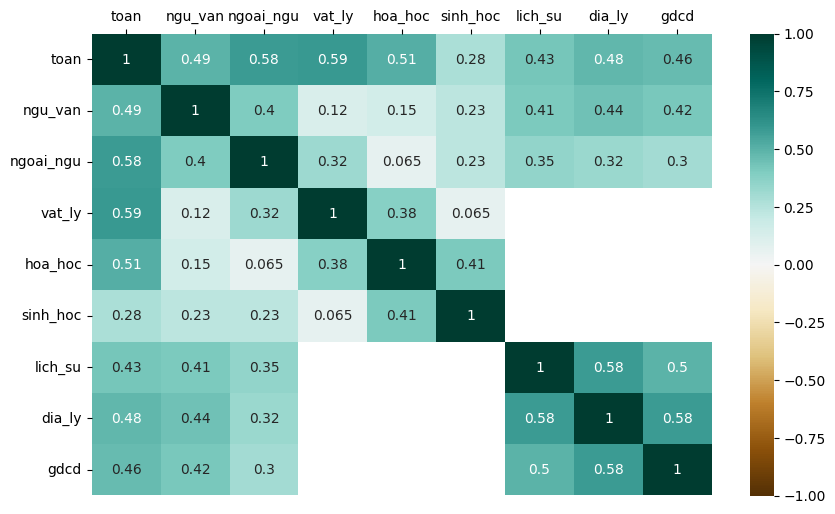

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df[df['nam_thi'] == 2020][['toan', 'ngu_van', 'ngoai_ngu', 'vat_ly', 'hoa_hoc',
       'sinh_hoc', 'lich_su', 'dia_ly', 'gdcd']].corr(), 
       vmin=-1, vmax=1, annot=True, cmap='BrBG')

ax.xaxis.tick_top()  # Đưa nhãn trục x lên trên
plt.show()


# Map

In [42]:
# Đánh giá điểm thi theo tỉnh năm 2020
df_2020 = df[df['nam_thi'] == 2020]

In [43]:
import geopandas as gpd
map_df = gpd.read_file('C:\\Users\\ADMIN\\Repo\\Data_analysis\\diaphantinh.geojson')


In [44]:
map_df.head(3)

gid  code         ten_tinh  \
0    1  AD01         An Giang   
1    2  AD01  Bà Rịa-Vũng Tàu   
2    3  AD01        Bắc Giang   

                                            geometry  
0  MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...  
1  MULTIPOLYGON (((106.0811 8.57754, 106.08069 8....  
2  MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...

In [45]:
# Function merge map_df
def merge_df(subject_name, map_df, df_2020):
    map_df = map_df.merge(df_2020.groupby('tinh')[subject_name].mean(), how='left', left_on='ten_tinh', right_on='tinh')
    map_df.rename(columns={subject_name: subject_name + '_avg'}, inplace=True)
    map_df = map_df.merge(df_2020.groupby('tinh')[subject_name].apply(lambda x: (x >= 9).sum()/len(x)), how='left', left_on='ten_tinh', right_on='tinh')
    map_df.rename(columns={subject_name: subject_name + '_>=9'}, inplace=True)
    map_df = map_df.merge(df_2020.groupby('tinh')[subject_name].std(), how='left', left_on='ten_tinh', right_on='tinh')
    map_df.rename(columns={subject_name: subject_name + '_std'}, inplace=True)
    return map_df

In [51]:
# Thống kê
for subject_name in ['toan', 'ngu_van', 'ngoai_ngu', 'vat_ly', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_ly', 'gdcd']:
    map_df = merge_df(subject_name, map_df, df_2020)

map_df.head(2)

gid  code         ten_tinh  \
0    1  AD01         An Giang   
1    2  AD01  Bà Rịa-Vũng Tàu   

                                            geometry  toan_avg  toan_std  \
0  MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...  6.918133  1.451342   
1  MULTIPOLYGON (((106.0811 8.57754, 106.08069 8....  7.193142  1.439262   

   toan_>=9  ngu_van_avg  ngu_van_std  ngu_van_>=9  ...  sinh_hoc_>=9  \
0  0.045738     7.615759     1.043052     0.096529  ...      0.005184   
1  0.068001     6.871082     1.089842     0.011100  ...      0.002884   

   lich_su_avg  lich_su_std  lich_su_>=9  dia_ly_avg  dia_ly_std  dia_ly_>=9  \
0     5.739920     1.621458     0.020802    7.173563    1.004992    0.012862   
1     5.141673     1.546484     0.009440    6.780428    1.047493    0.005419   

   gdcd_avg  gdcd_std  gdcd_>=9  
0  8.567325  0.885114  0.227377  
1  8.209893  1.013309  0.104624  

[2 rows x 58 columns]

In [52]:
map_df_stats = map_df[['toan_std', 'ngu_van_std', 'ngoai_ngu_std', 'vat_ly_std', 'hoa_hoc_std', 'sinh_hoc_std', 'lich_su_std', 'dia_ly_std', 'gdcd_std']]

In [53]:
map_df_stats.head(2)

toan_std  toan_std  ngu_van_std  ngu_van_std  ngoai_ngu_std  ngoai_ngu_std  \
0  1.451342  1.451342     1.043052     1.043052       1.466709       1.466709   
1  1.439262  1.439262     1.089842     1.089842       1.778777       1.778777   

   vat_ly_std  vat_ly_std  hoa_hoc_std  hoa_hoc_std  sinh_hoc_std  \
0    1.309348    1.309348     1.395357     1.395357      1.204488   
1    1.327886    1.327886     1.486242     1.486242      1.194125   

   sinh_hoc_std  lich_su_std  lich_su_std  dia_ly_std  dia_ly_std  gdcd_std  \
0      1.204488     1.621458     1.621458    1.004992    1.004992  0.885114   
1      1.194125     1.546484     1.546484    1.047493    1.047493  1.013309   

   gdcd_std  
0  0.885114  
1  1.013309

In [68]:
# Thống kê map_df_stats
map_df_stats.describe()


toan_std   toan_std  ngu_van_std  ngu_van_std  ngoai_ngu_std  \
count  62.000000  62.000000    62.000000    62.000000      62.000000   
mean    1.718040   1.718040     1.178989     1.178989       1.597730   
std     0.191786   0.191786     0.157805     0.157805       0.178978   
min     1.300034   1.300034     0.861794     0.861794       1.173069   
25%     1.591246   1.591246     1.080207     1.080207       1.477474   
50%     1.715319   1.715319     1.159906     1.159906       1.603100   
75%     1.879343   1.879343     1.285596     1.285596       1.697655   
max     2.110039   2.110039     1.565741     1.565741       2.194973   

       ngoai_ngu_std  vat_ly_std  vat_ly_std  hoa_hoc_std  hoa_hoc_std  \
count      62.000000   62.000000   62.000000    62.000000    62.000000   
mean        1.597730    1.491925    1.491925     1.579883     1.579883   
std         0.178978    0.151369    0.151369     0.134584     0.134584   
min         1.173069    1.240840    1.240840     1.291705     1.291705   
25%         1.477474    1.362877    1.362877     1.473894     1.473894   
50%         1.603100    1.488944    1.488944     1.593835     1.593835   
75%         1.697655    1.575629    1.575629     1.656681     1.656681   
max         2.194973    1.873308    1.873308     1.901370     1.901370   

       sinh_hoc_std  sinh_hoc_std  lich_su_std  lich_su_std  dia_ly_std  \
count     62.000000     62.000000    62.000000    62.000000   62.000000   
mean       1.321086      1.321086     1.583057     1.583057    1.153268   
std        0.110685      0.110685     0.066222     0.066222    0.105240   
min        1.096831      1.096831     1.471845     1.471845    0.932023   
25%        1.237366      1.237366     1.538825     1.538825    1.075721   
50%        1.323693      1.323693     1.572964     1.572964    1.139657   
75%        1.387988      1.387988     1.621110     1.621110    1.216895   
max        1.589572      1.589572     1.764709     1.764709    1.421673   

       dia_ly_std   gdcd_std   gdcd_std  
count   62.000000  62.000000  62.000000  
mean     1.153268   1.033926   1.033926  
std      0.105240   0.154393   0.154393  
min      0.932023   0.687925   0.687925  
25%      1.075721   0.916027   0.916027  
50%      1.139657   1.005888   1.005888  
75%      1.216895   1.153140   1.153140  
max      1.421673   1.440721   1.440721

In [11]:
def draw_map(variable):
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(50, 17))

    # remove the axis
    ax.axis('off')

    # create map
    if 'avg' in variable:
        cmap = 'Greens'
    elif '>=9' in variable:
        cmap = 'Reds'
    else:
        cmap = 'Blues'
    map_df.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

    # Add Labels
    map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
    map_df['coords'] = [coords[0] for coords in map_df['coords']]
    map_df.sort_values(by=[variable], ascending=False, inplace=True)
    for idx, row in map_df[:15].iterrows():
        plt.annotate(text=row['ten_tinh'], xy=row['coords'], horizontalalignment='center')

## ------------------------------------------------------------------------------------------
## ------------------------------------------ Toán -----------------------------------------
## ------------------------------------------------------------------------------------------

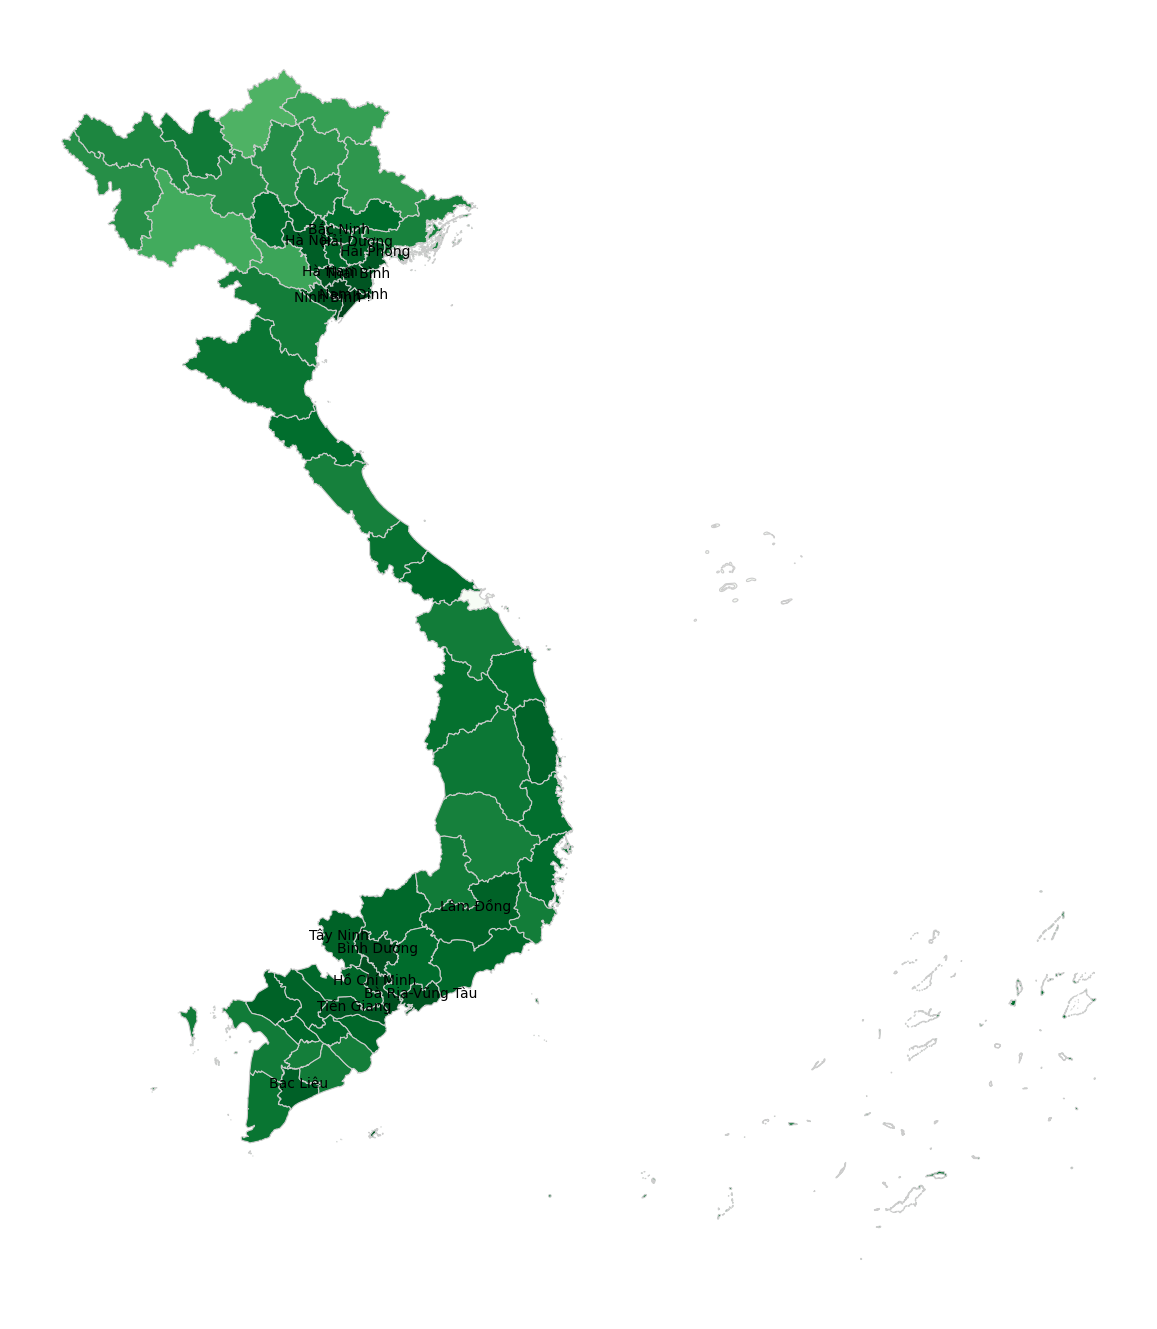

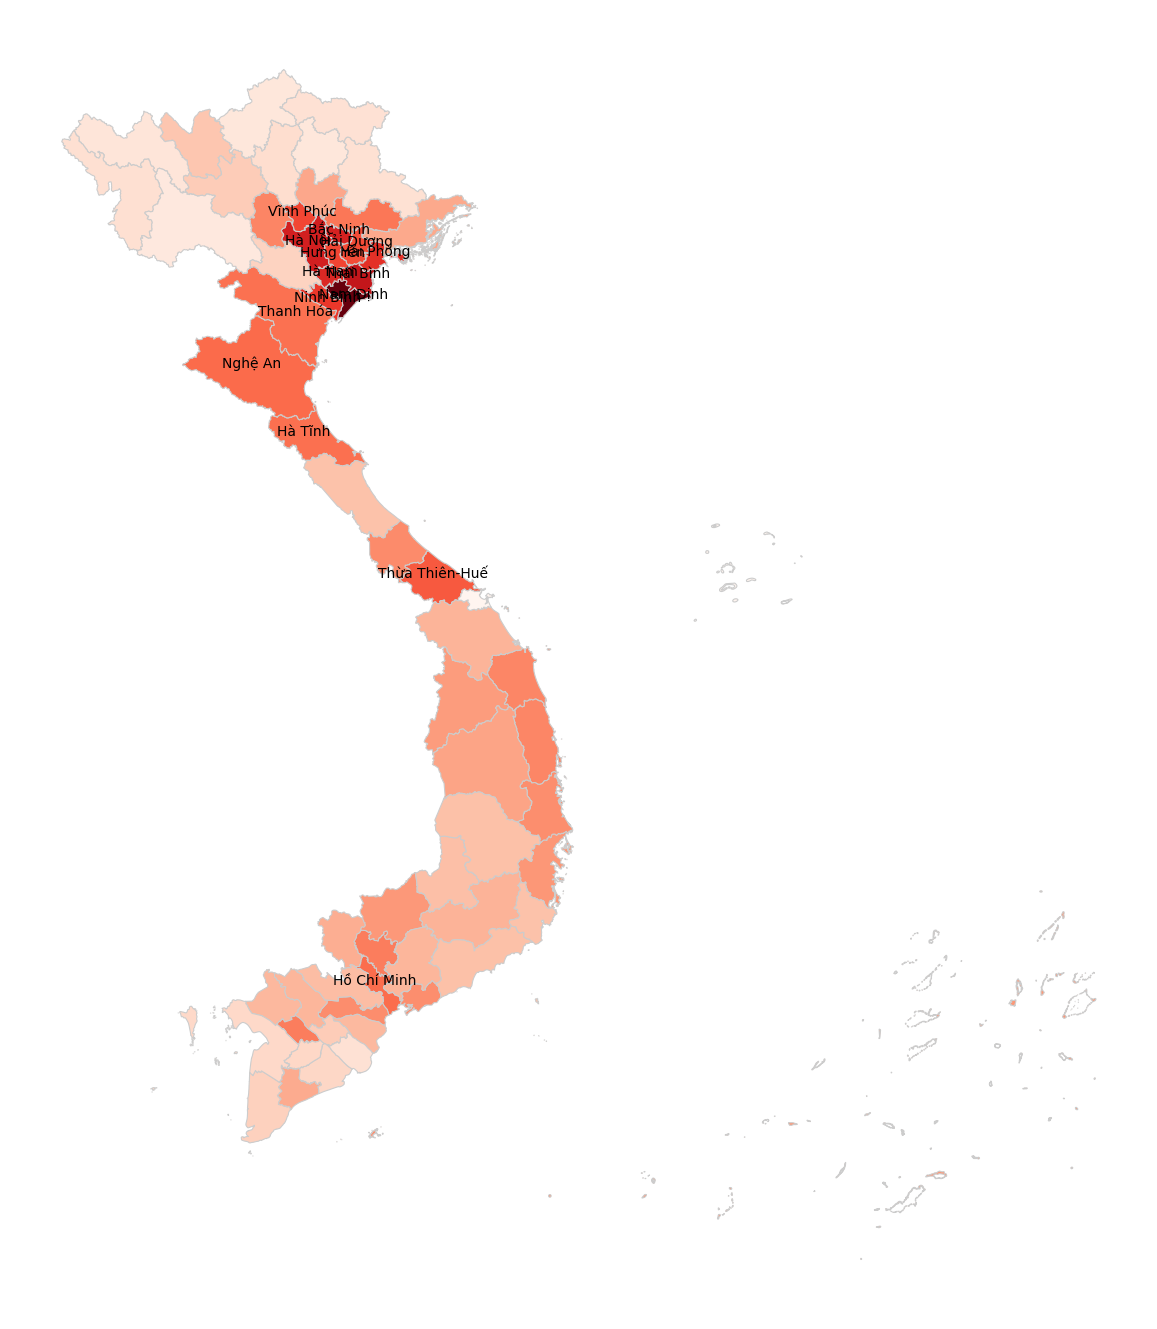

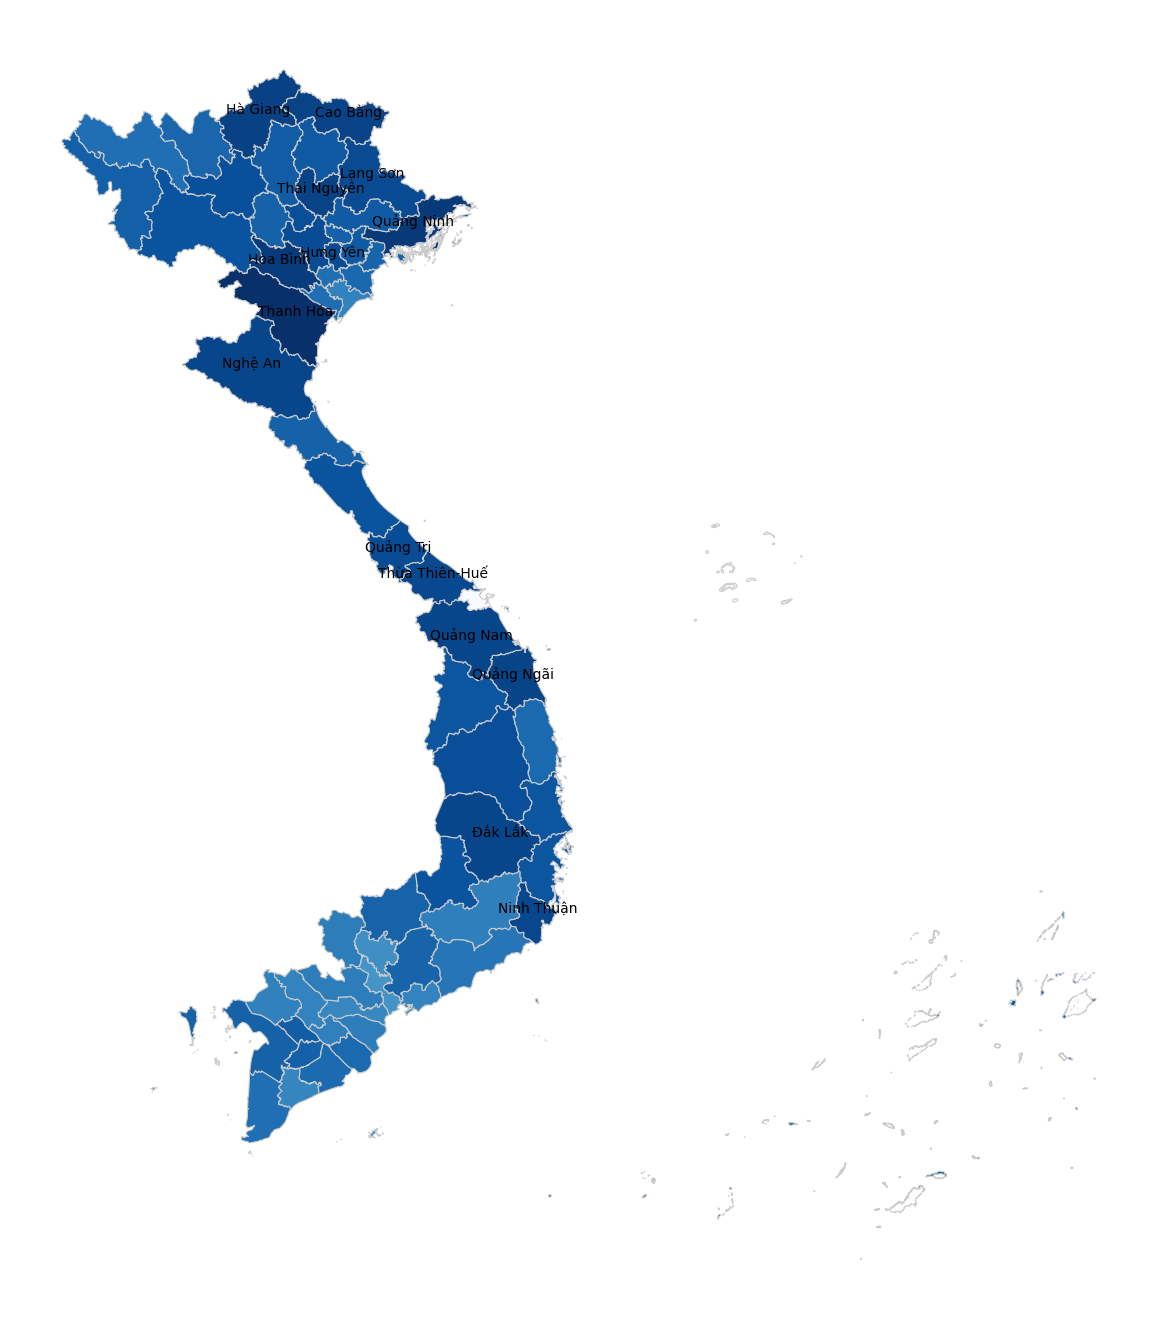

In [ ]:
draw_map('toan_avg')
draw_map('toan_>=9')
draw_map('toan_std')

## ------------------------------------------------------------------------------------------
## ---------------------------------------- Ngữ văn ---------------------------------------
## ------------------------------------------------------------------------------------------

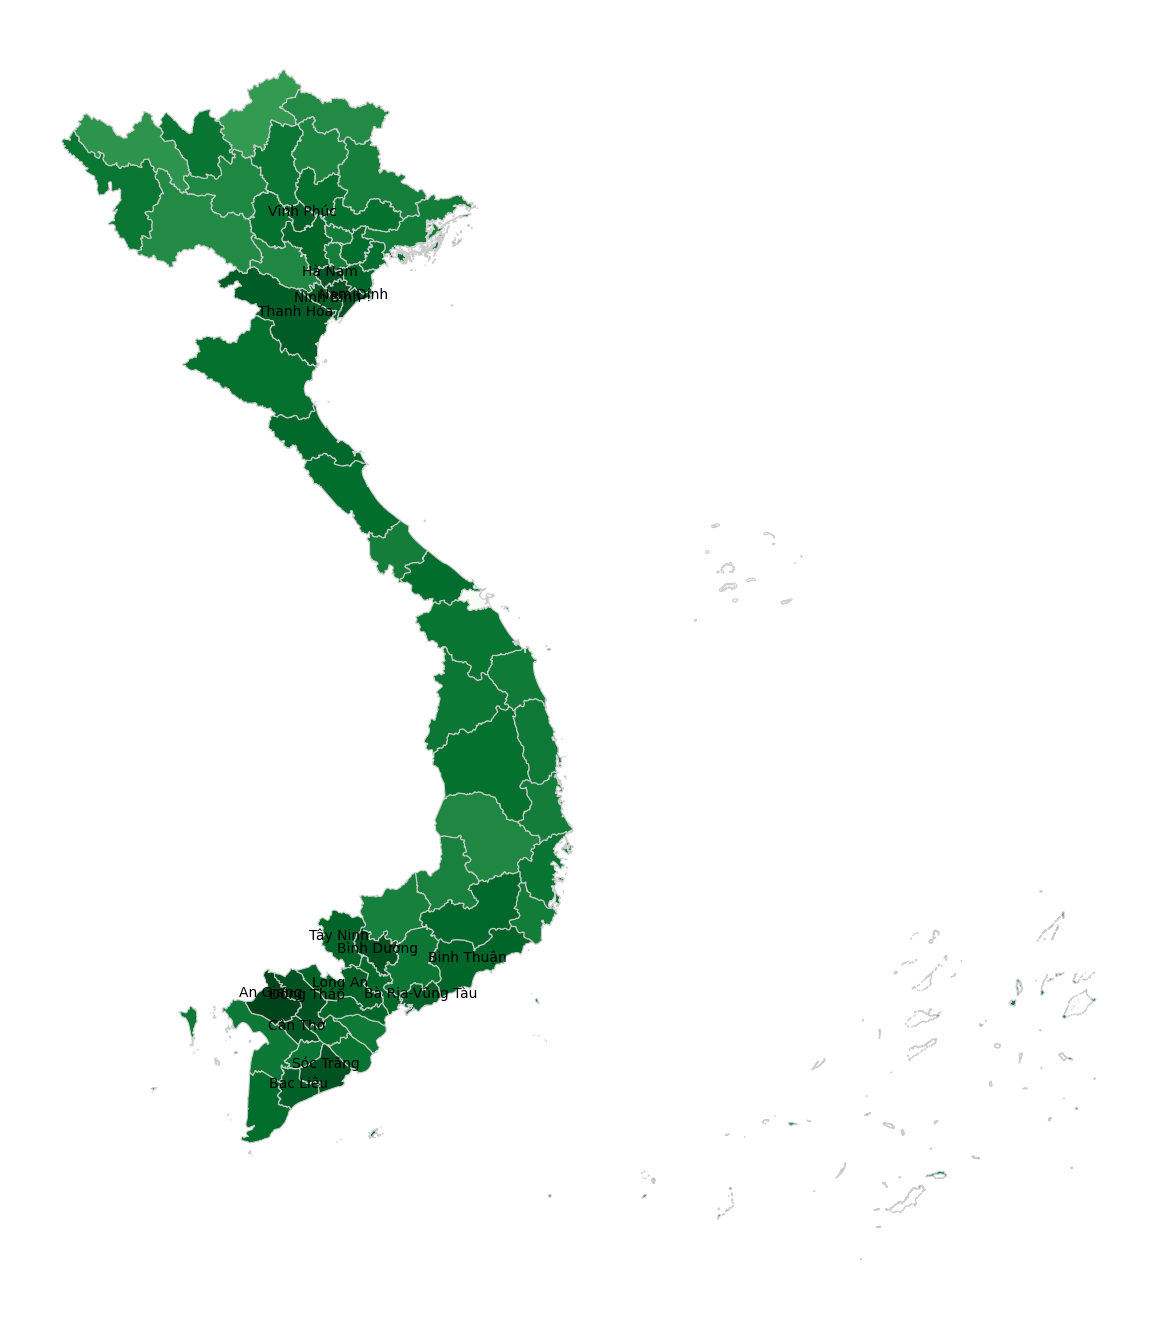

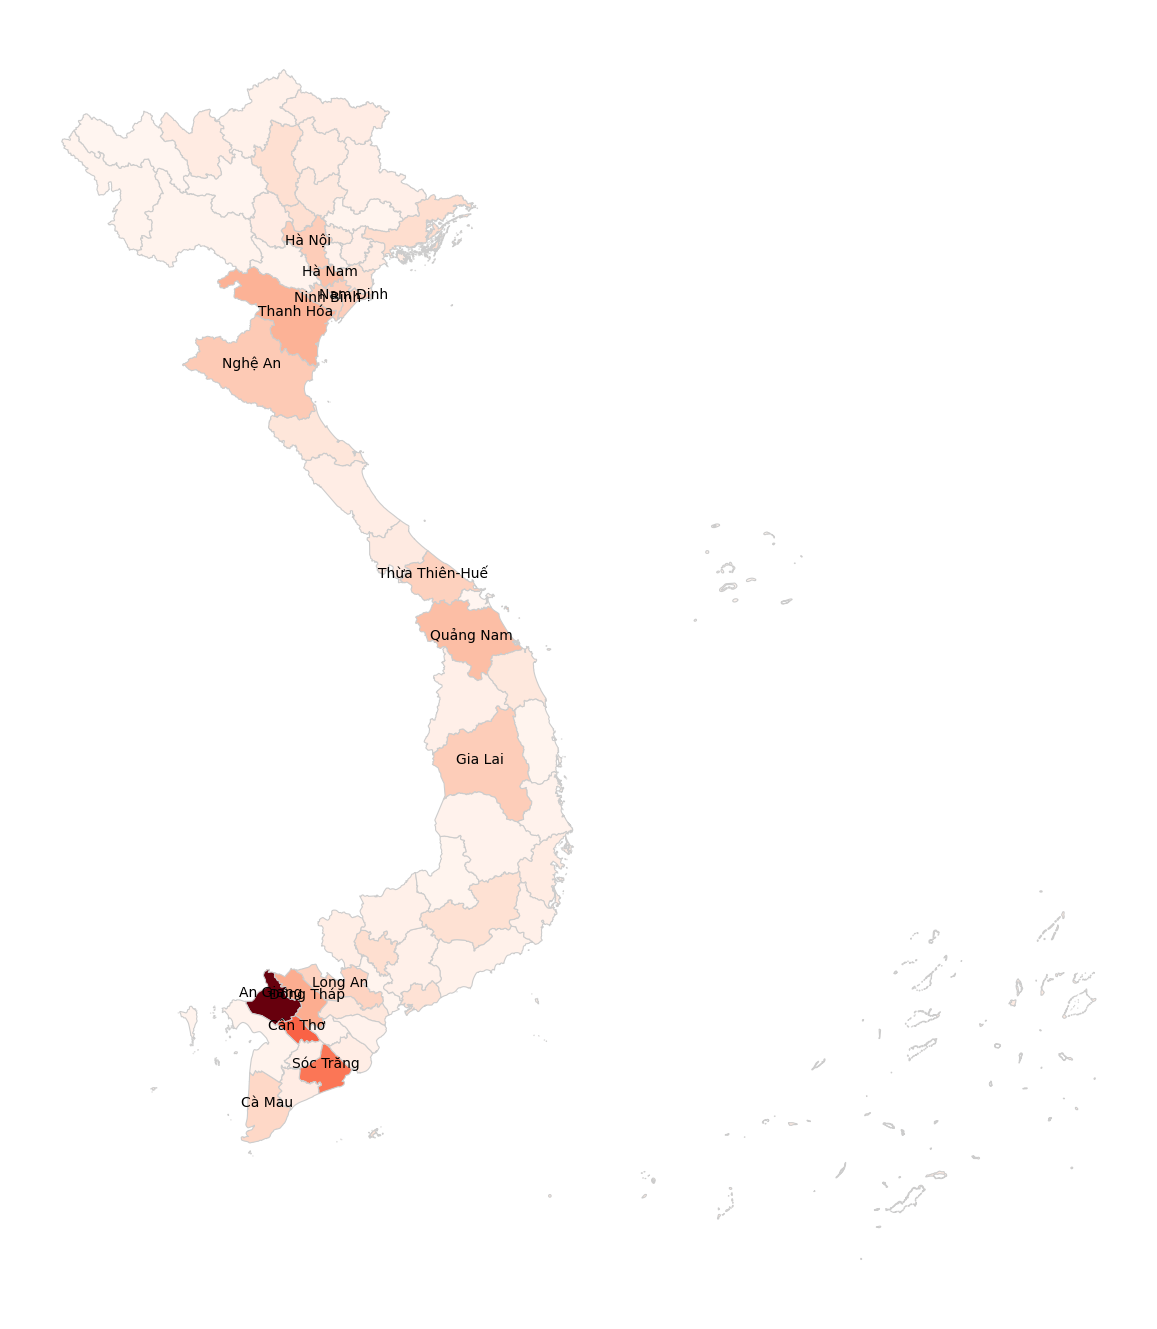

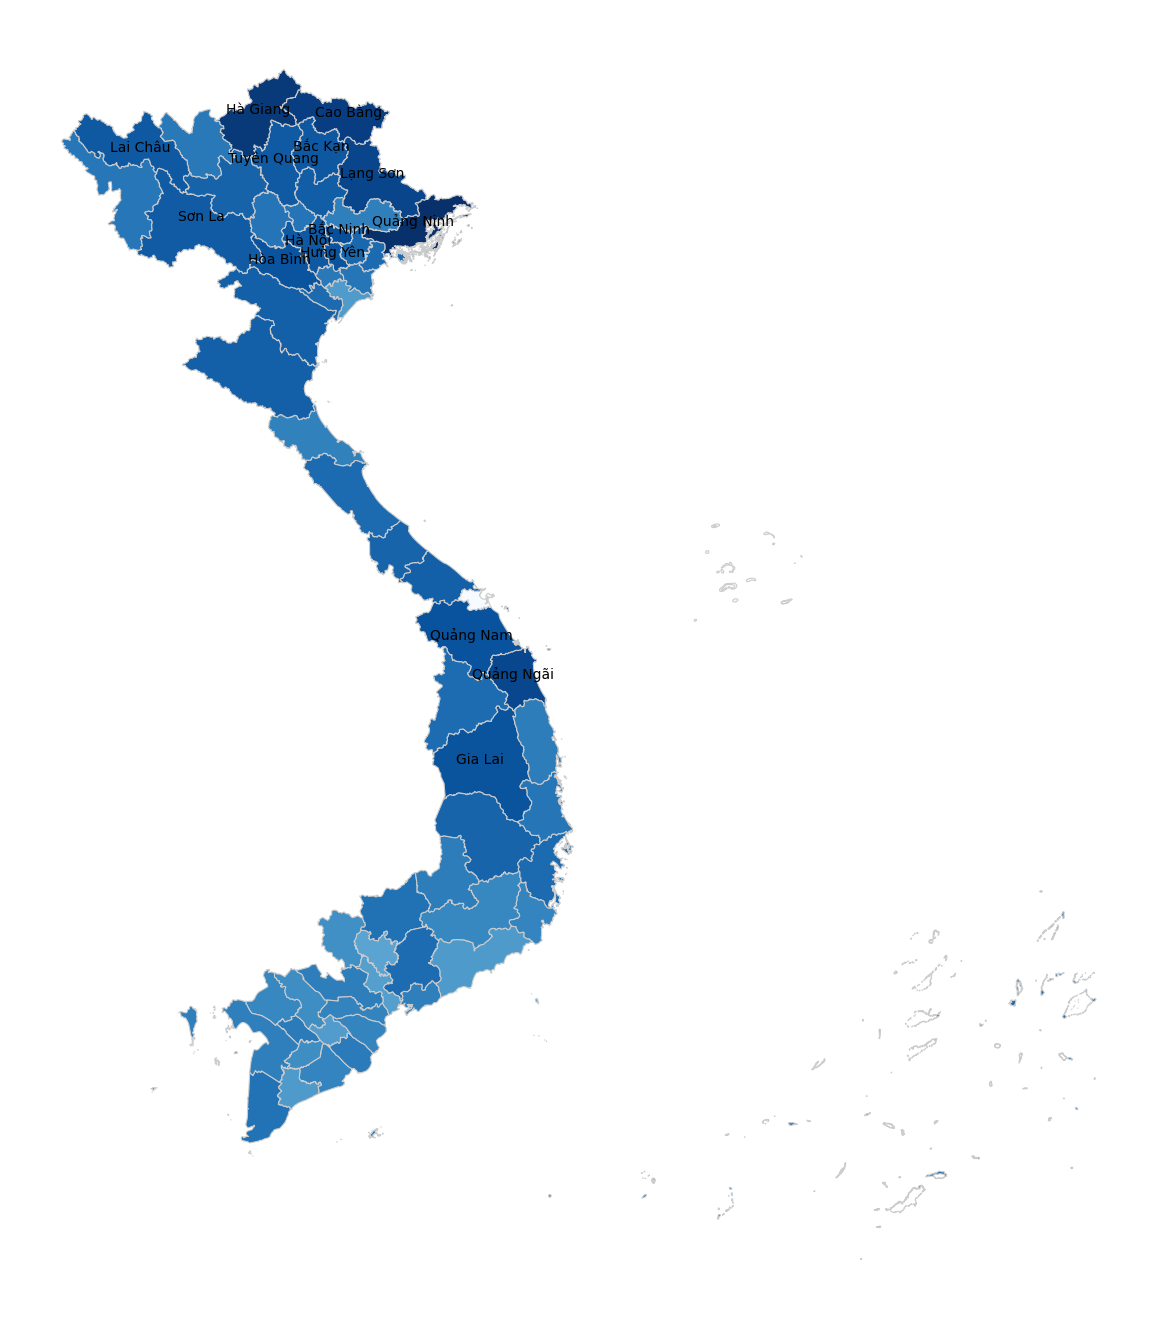

In [ ]:
draw_map('ngu_van_avg')
draw_map('ngu_van_>=9')
draw_map('ngu_van_std')

## ------------------------------------------------------------------------------------------
## --------------------------------------- Ngoại ngữ --------------------------------------
## ------------------------------------------------------------------------------------------

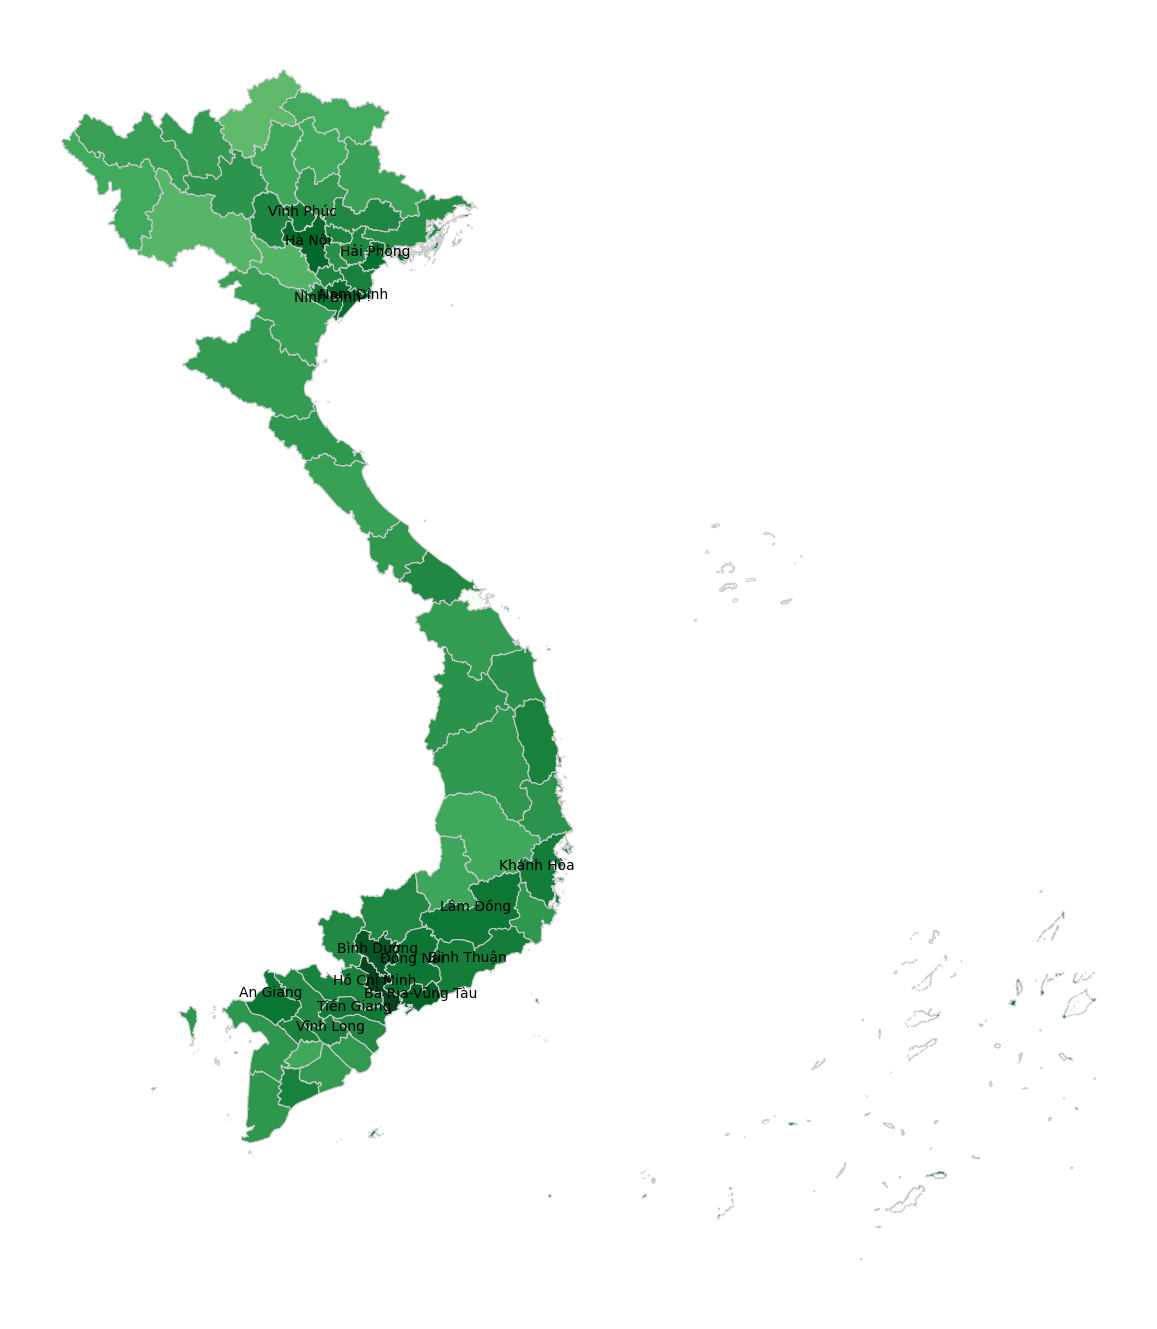

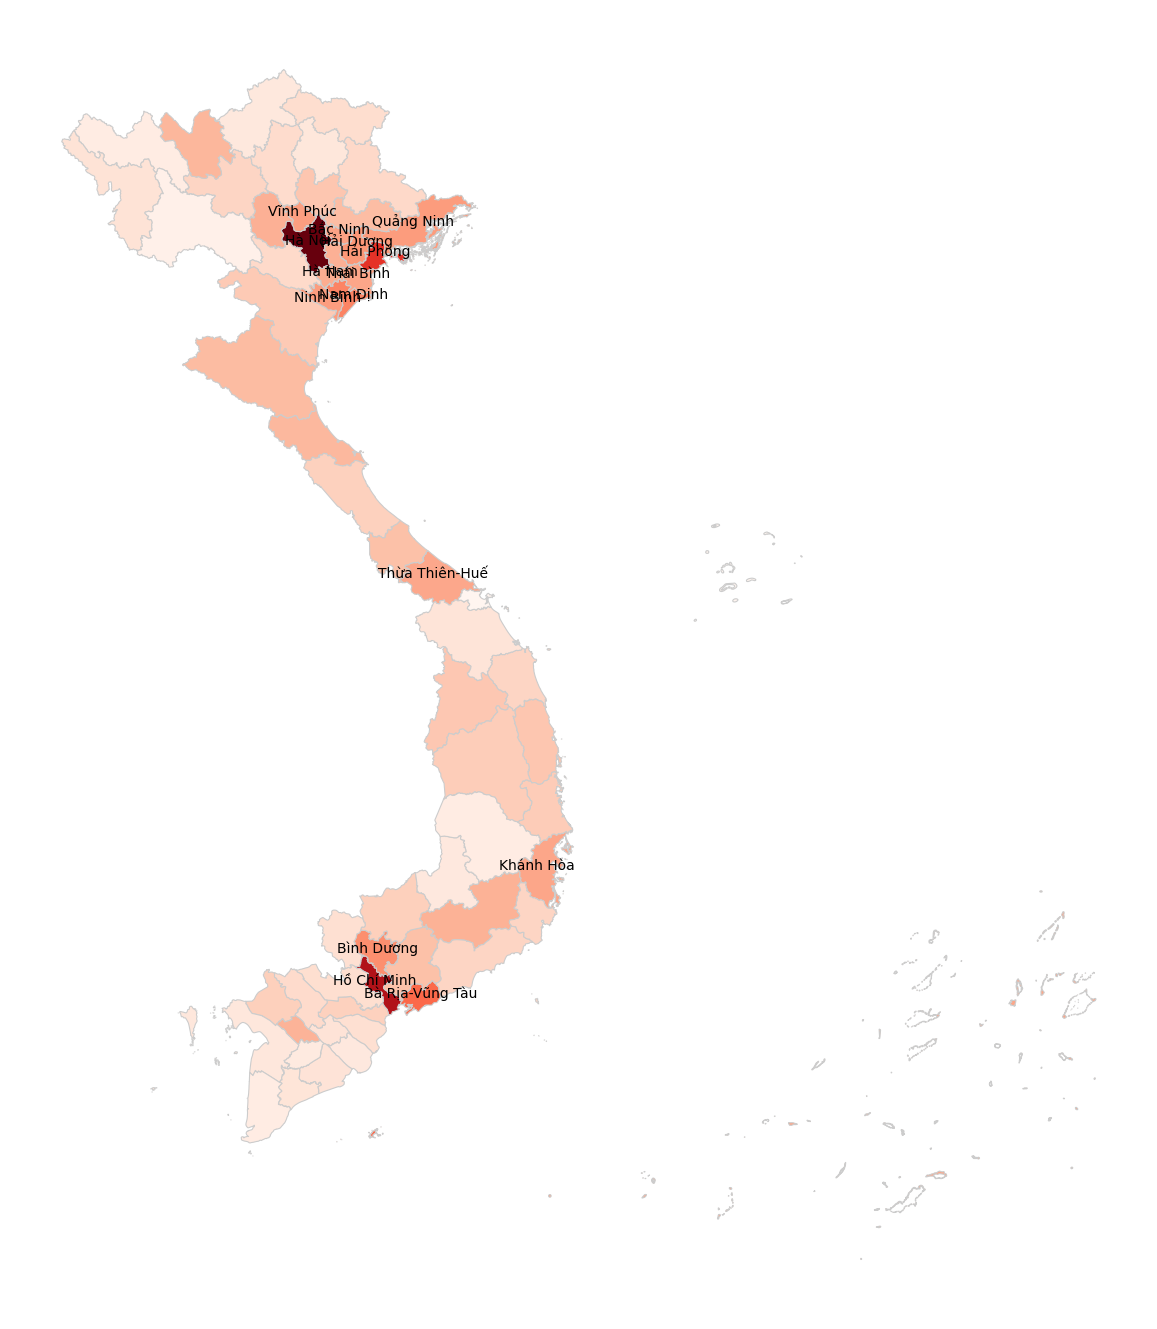

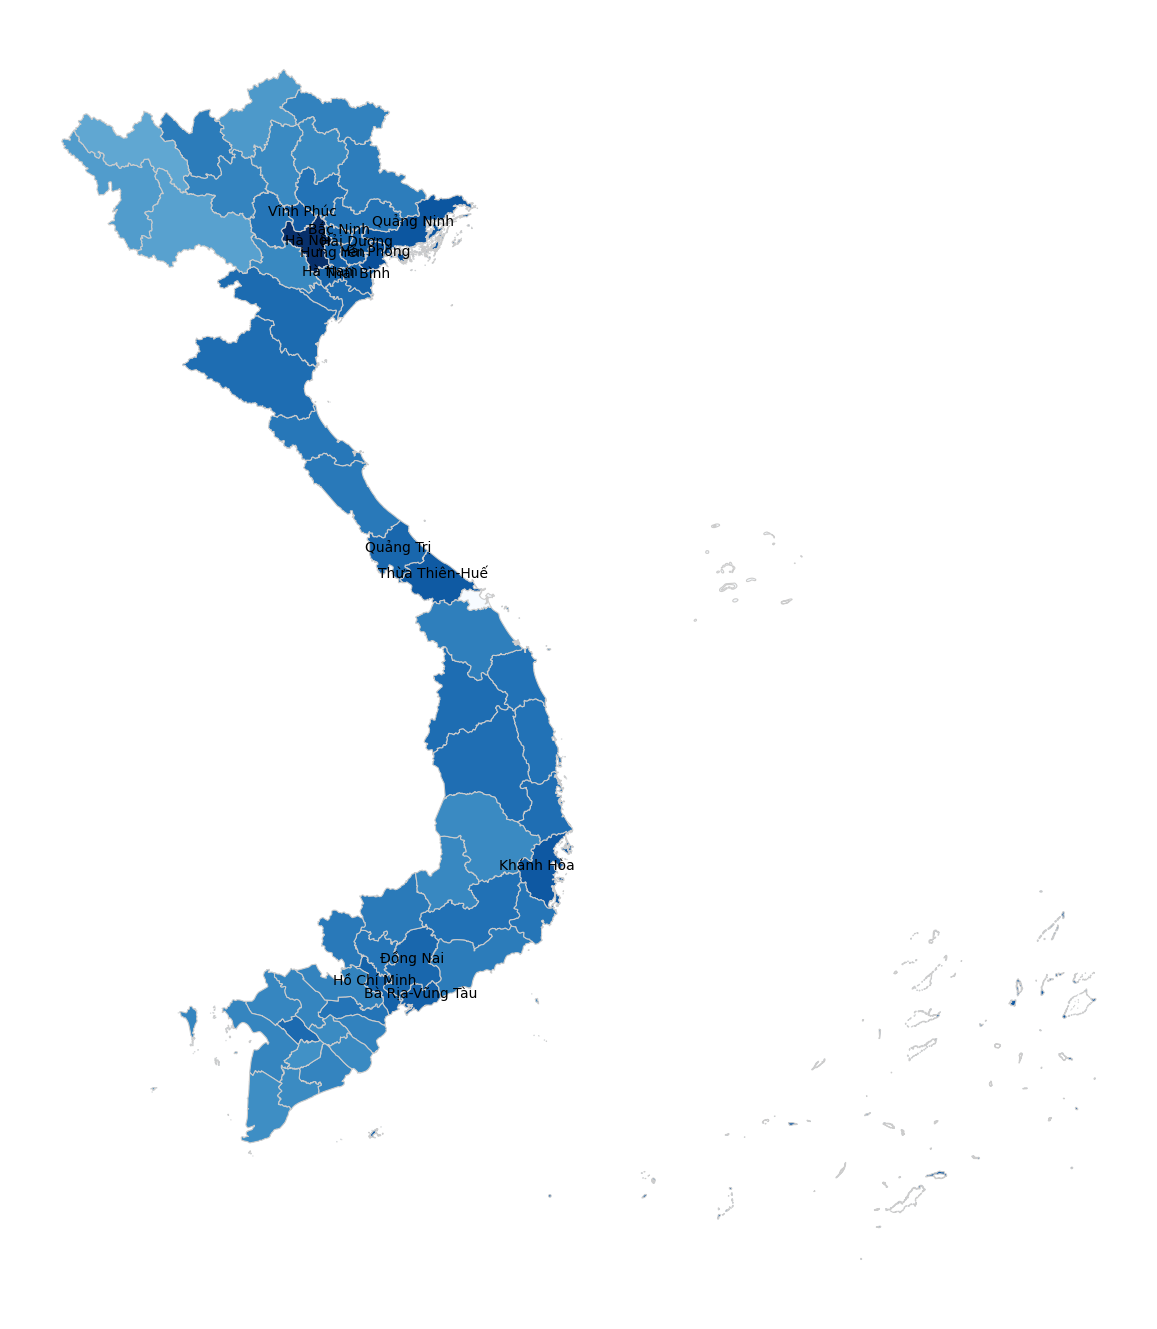

In [ ]:
draw_map('ngoai_ngu_avg')
draw_map('ngoai_ngu_>=9')
draw_map('ngoai_ngu_std')

## ------------------------------------------------------------------------------------------
## ----------------------------------------- Vật lý -----------------------------------------
## ------------------------------------------------------------------------------------------

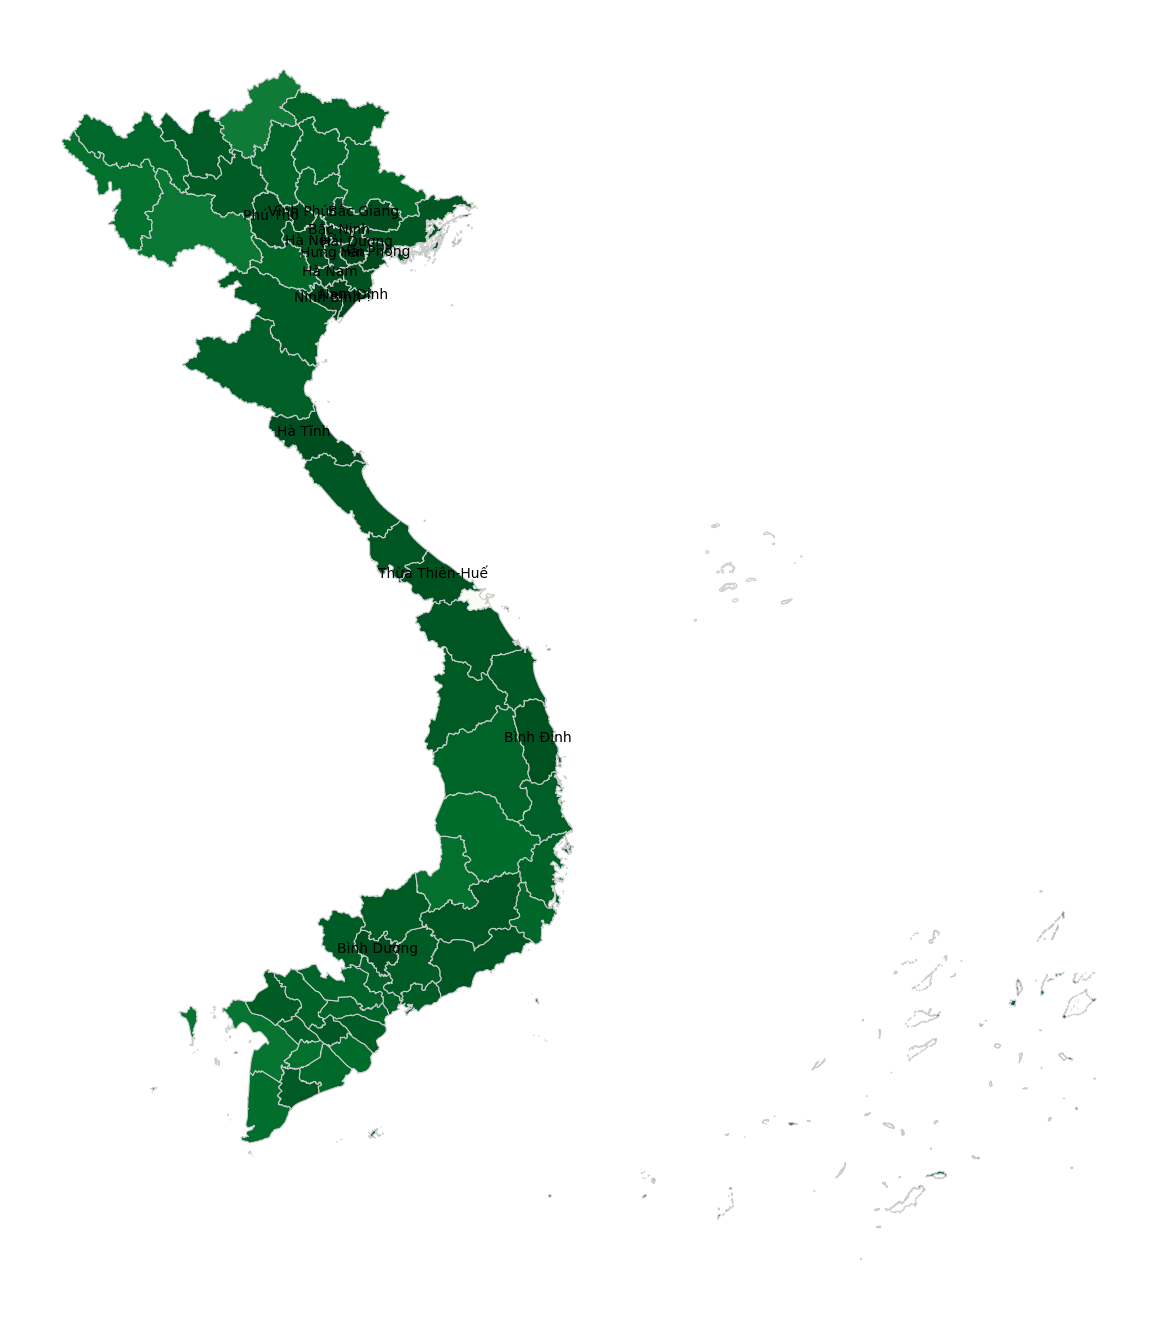

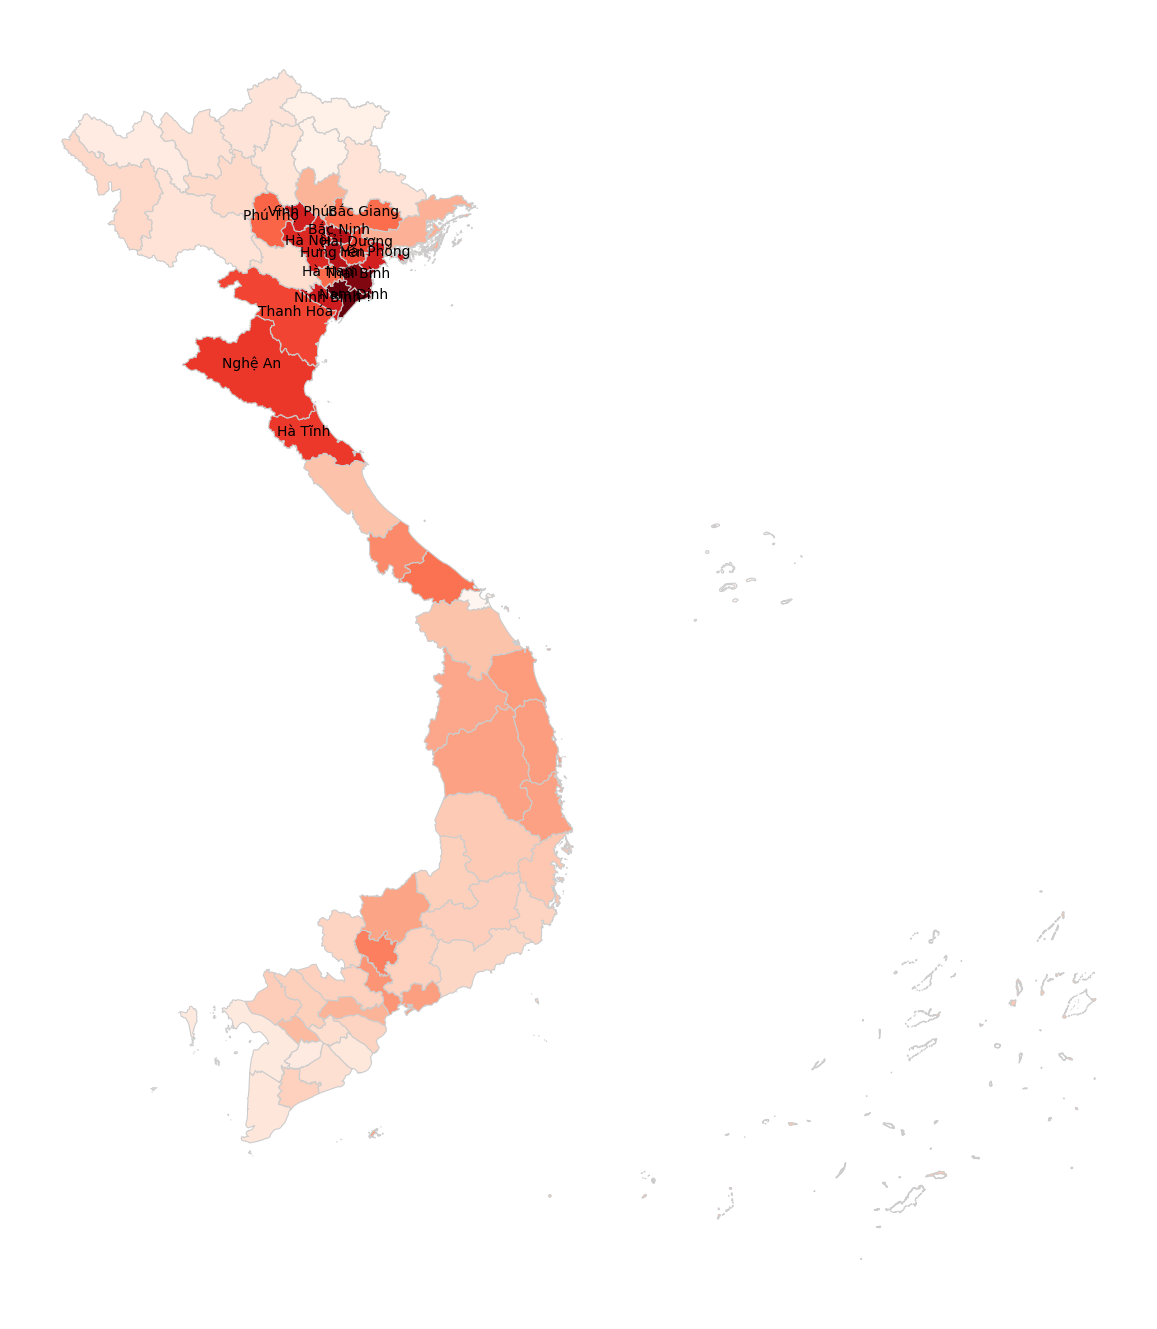

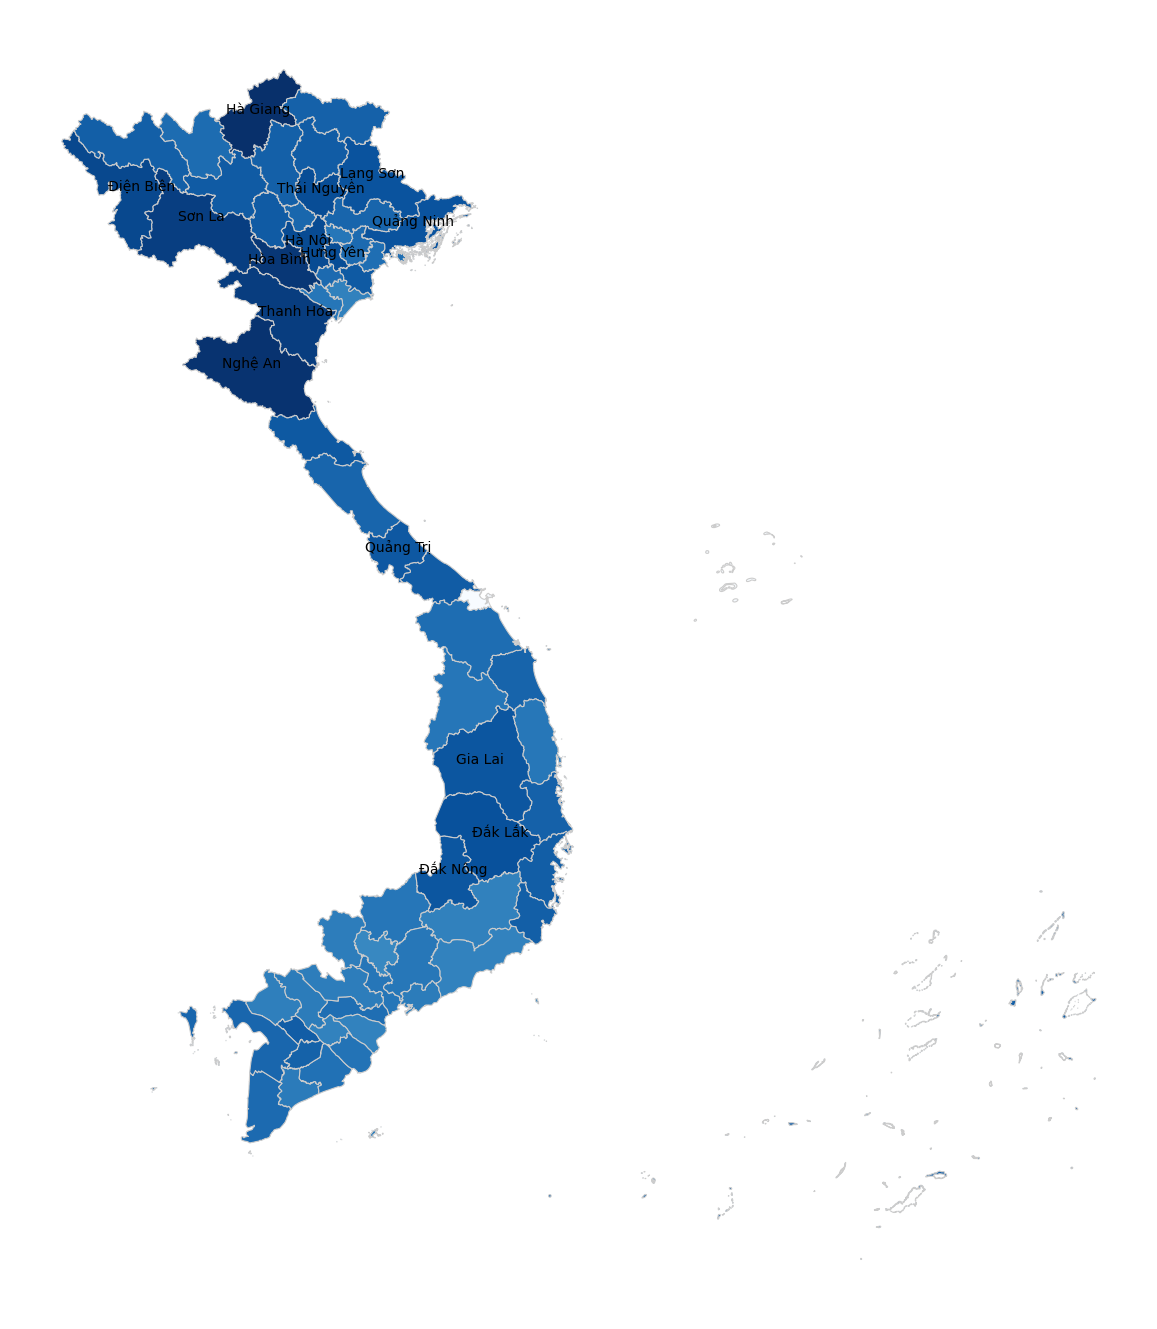

In [ ]:
draw_map('vat_ly_avg')
draw_map('vat_ly_>=9')
draw_map('vat_ly_std')

## ------------------------------------------------------------------------------------------
## ---------------------------------------- Hóa học ---------------------------------------
## ------------------------------------------------------------------------------------------

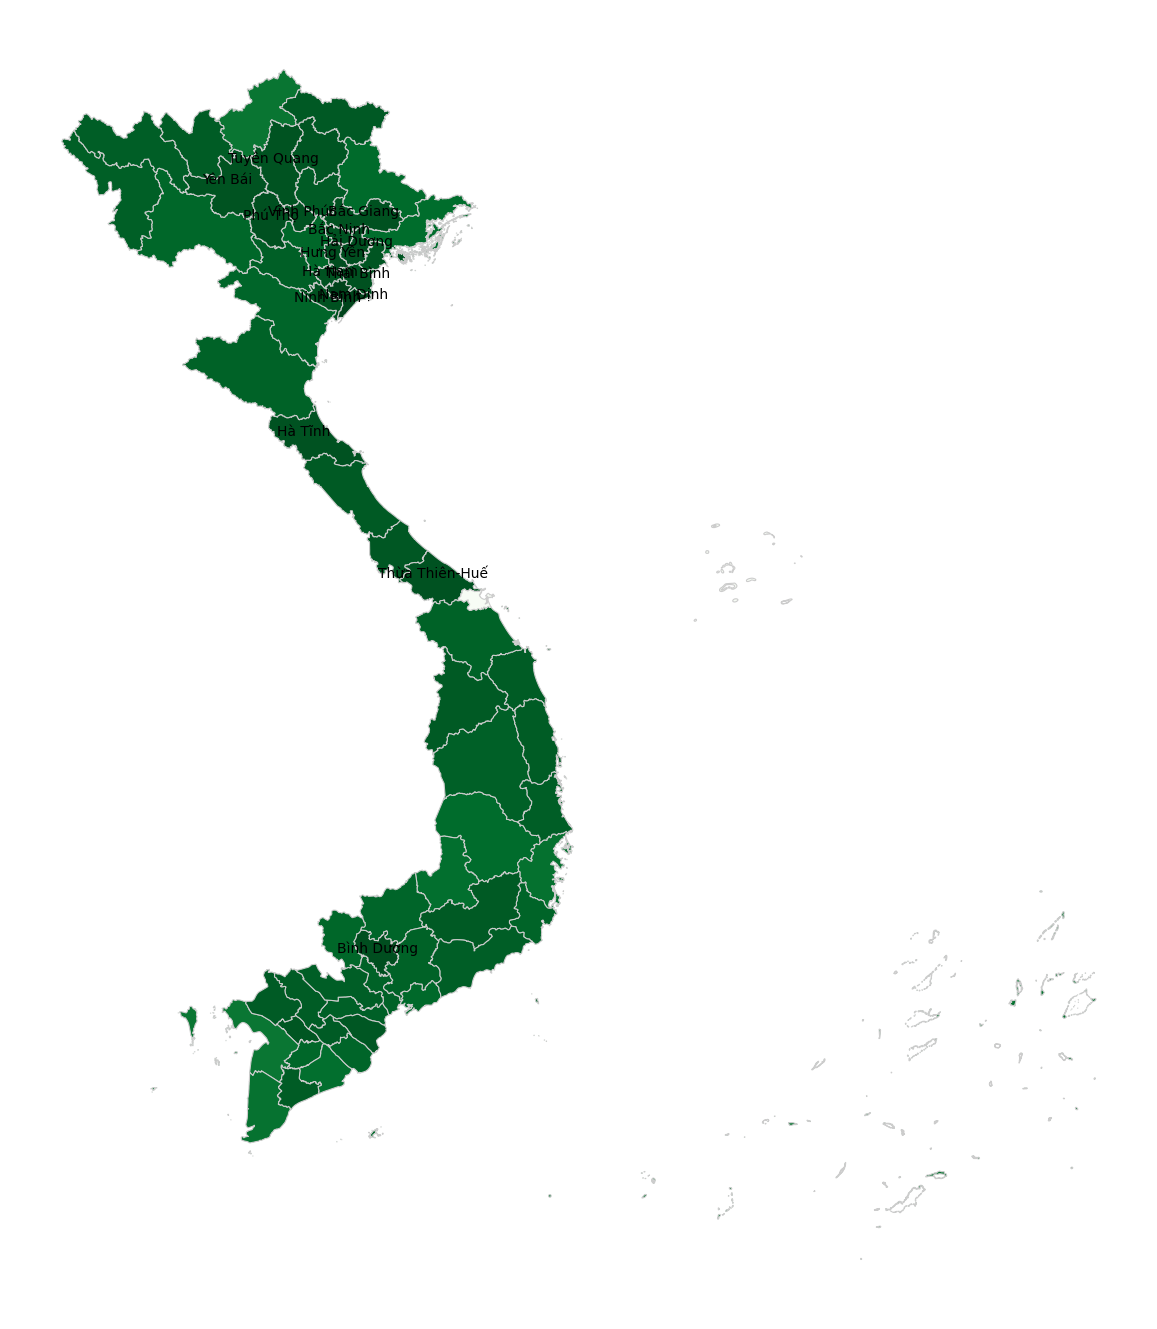

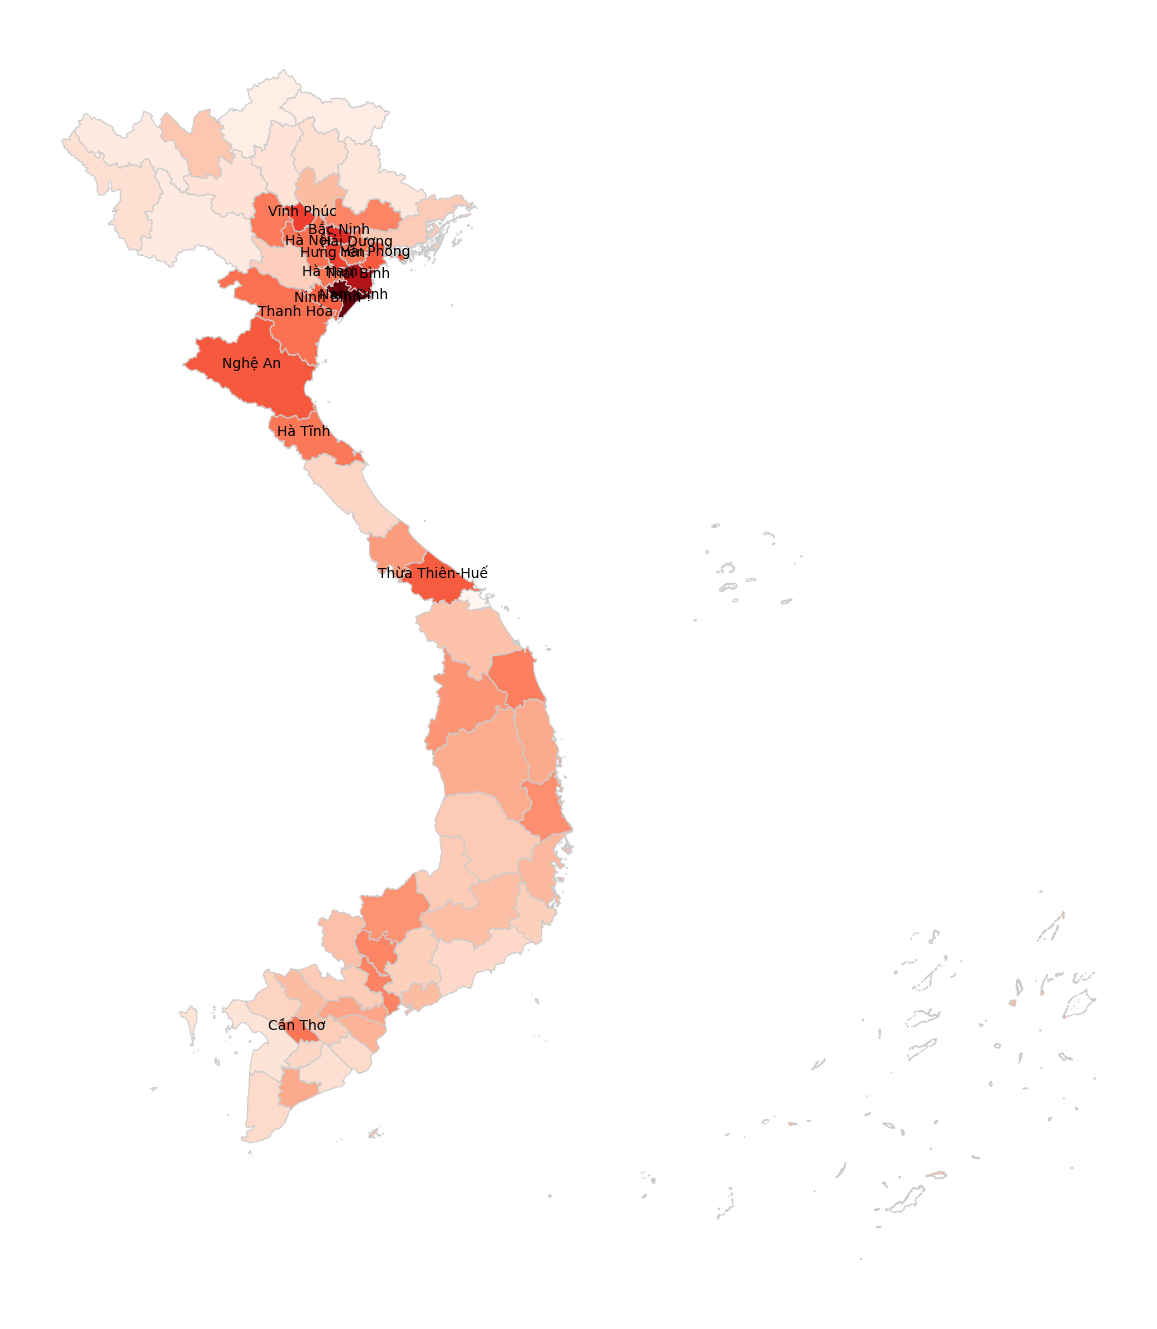

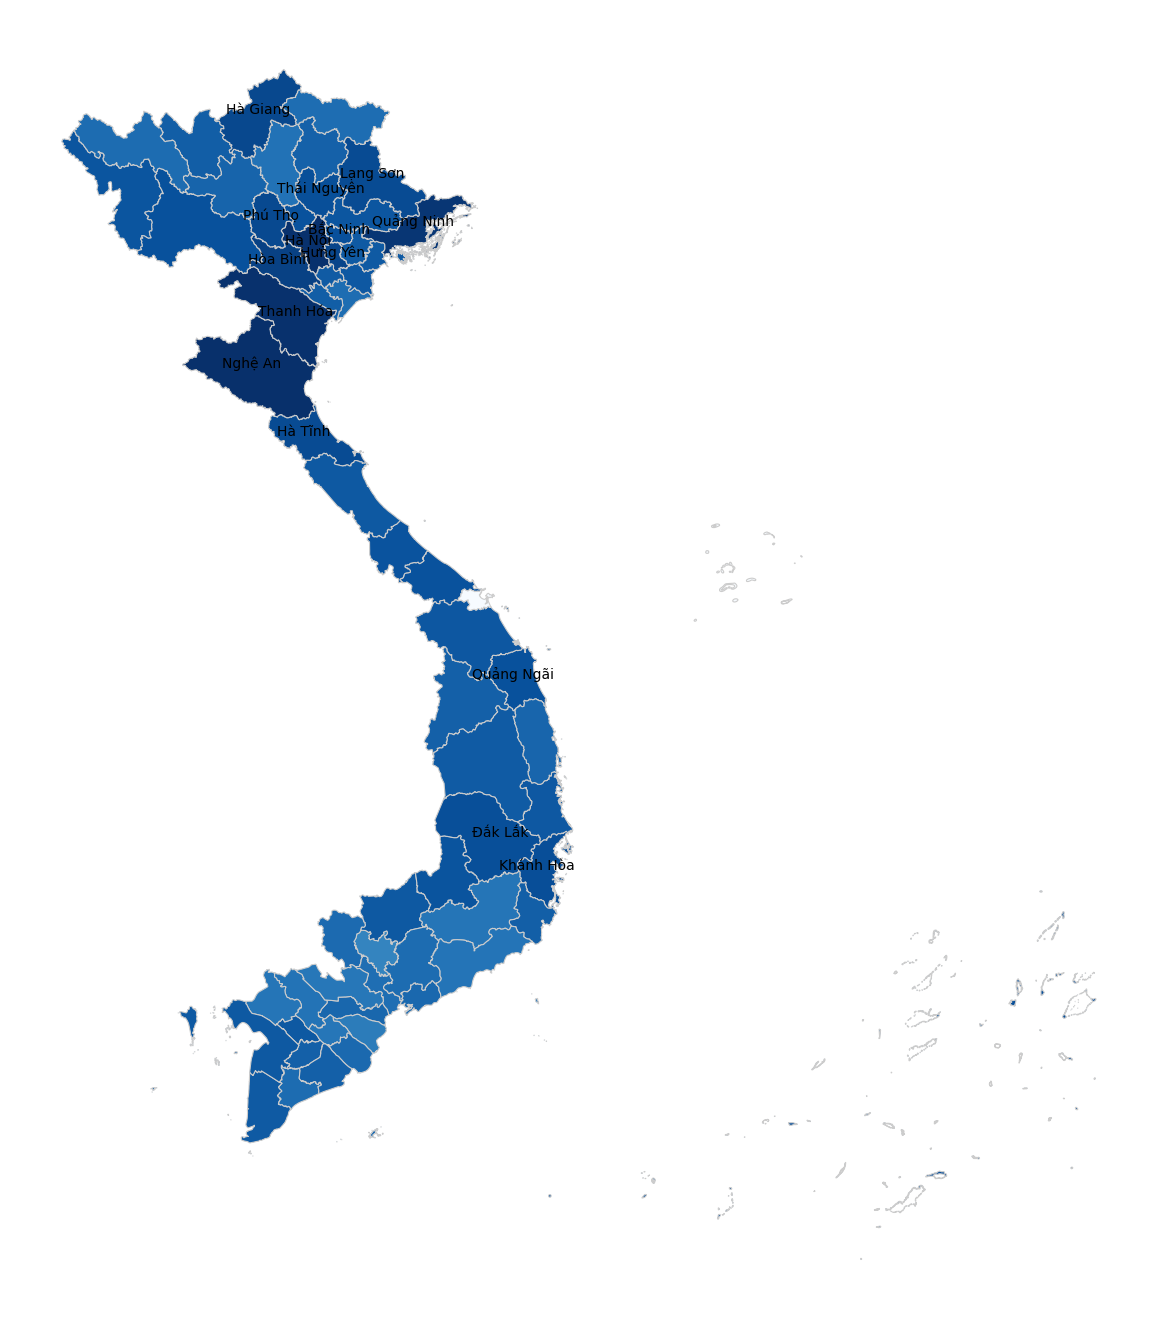

In [ ]:
draw_map('hoa_hoc_avg')
draw_map('hoa_hoc_>=9')
draw_map('hoa_hoc_std')

## ------------------------------------------------------------------------------------------
## ---------------------------------------- Sinh học ---------------------------------------
## ------------------------------------------------------------------------------------------

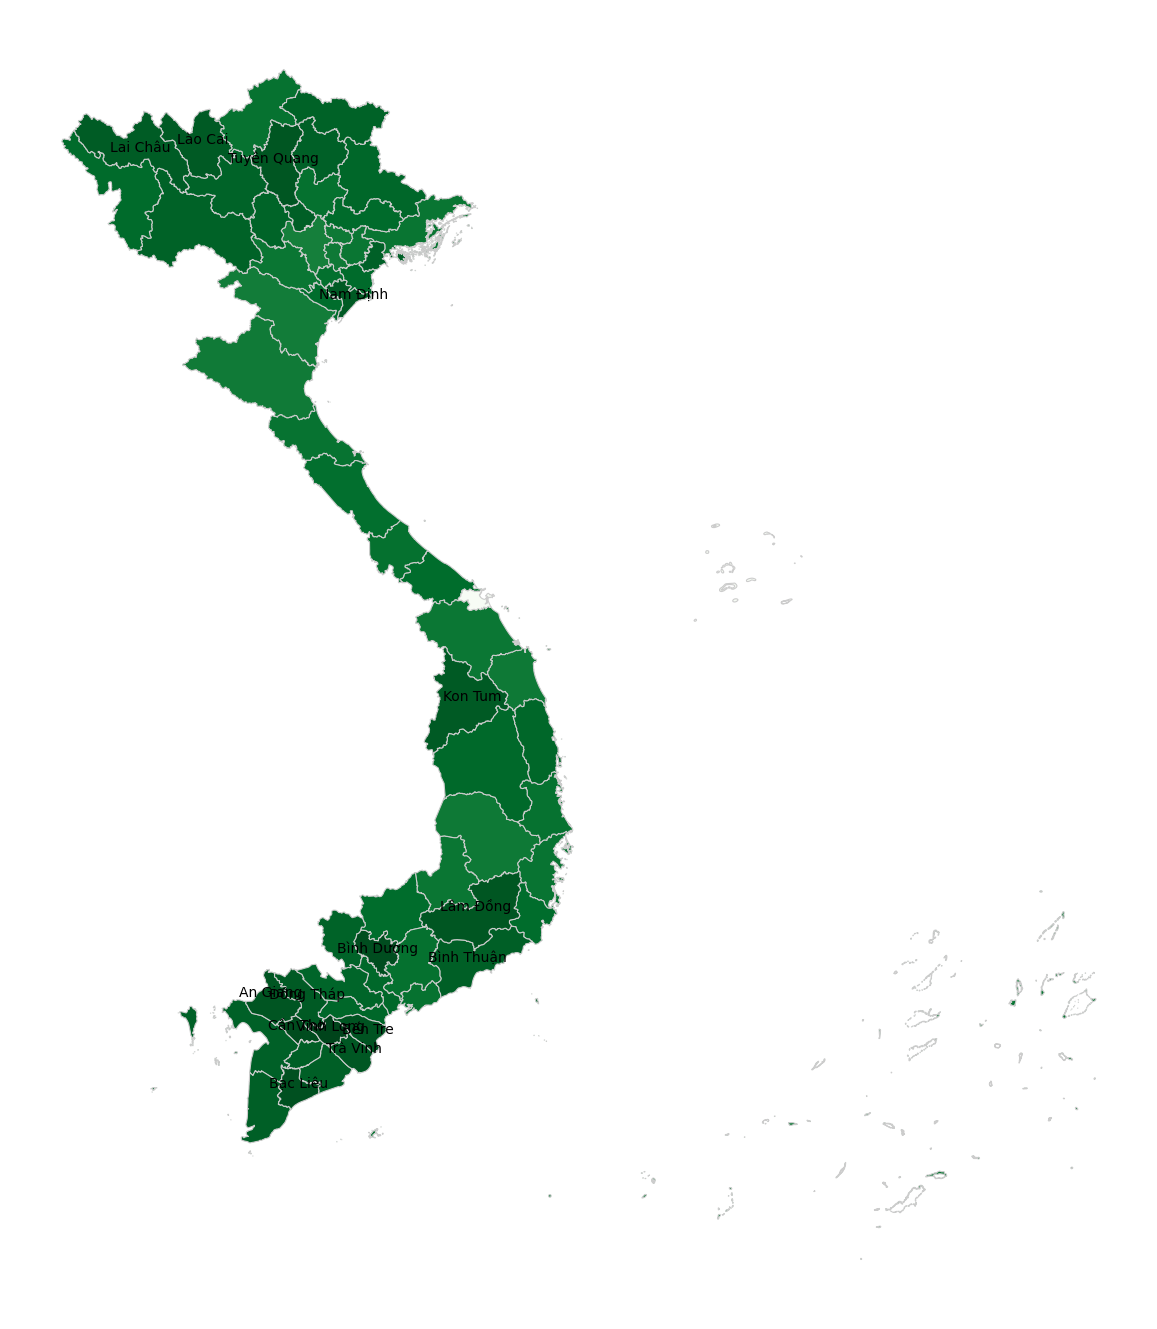

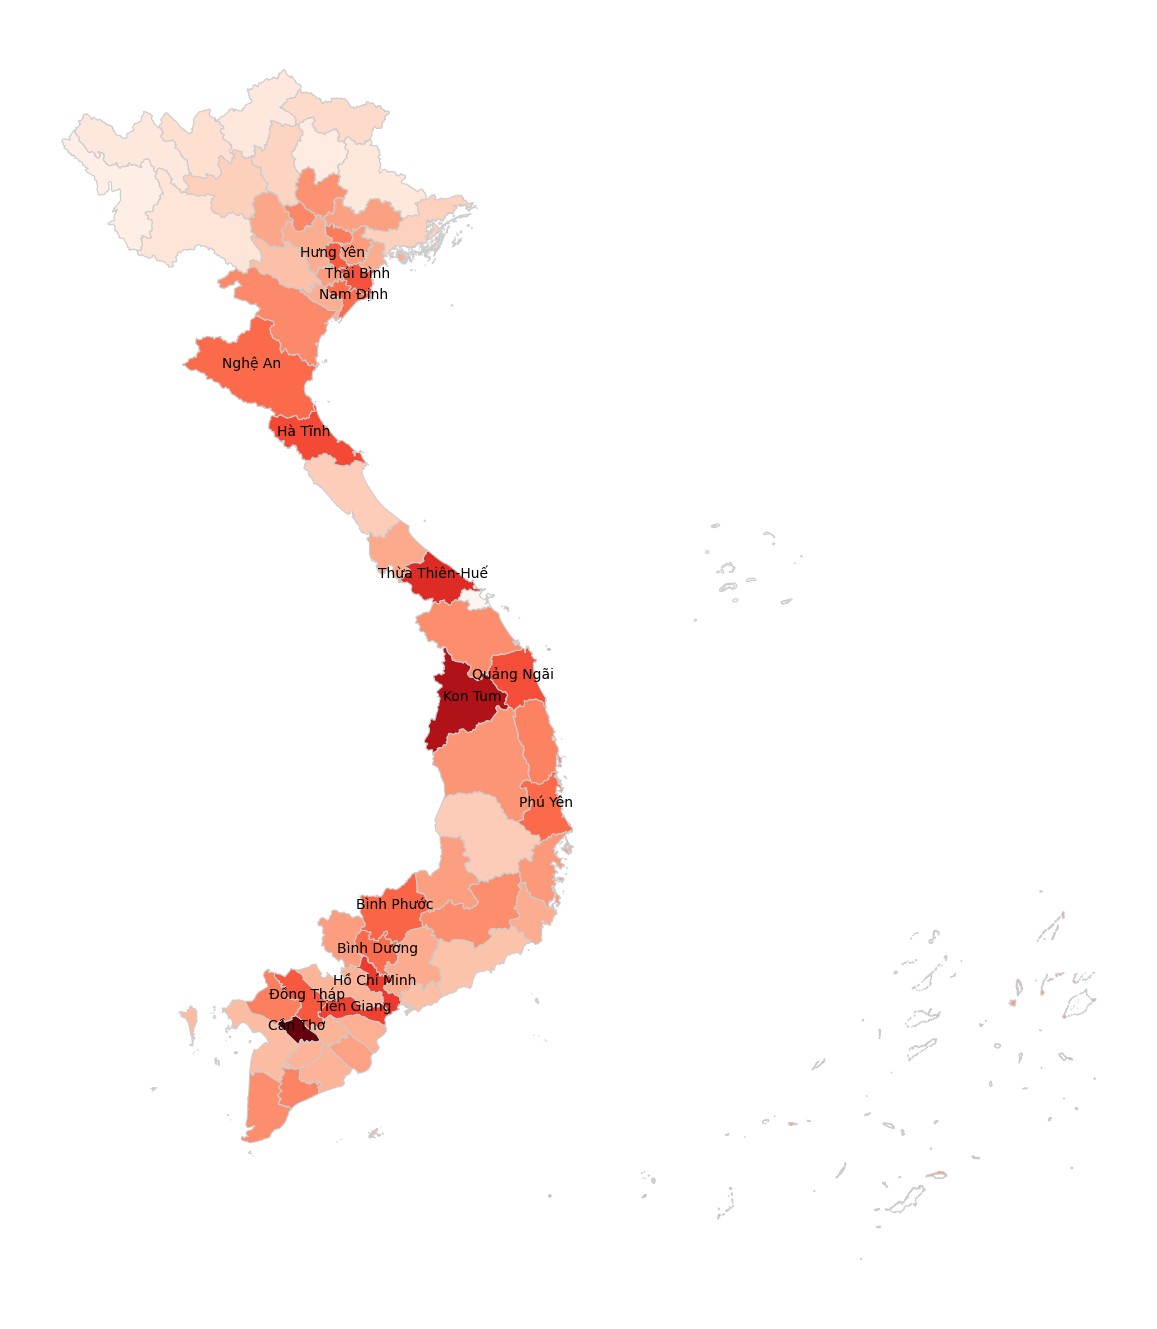

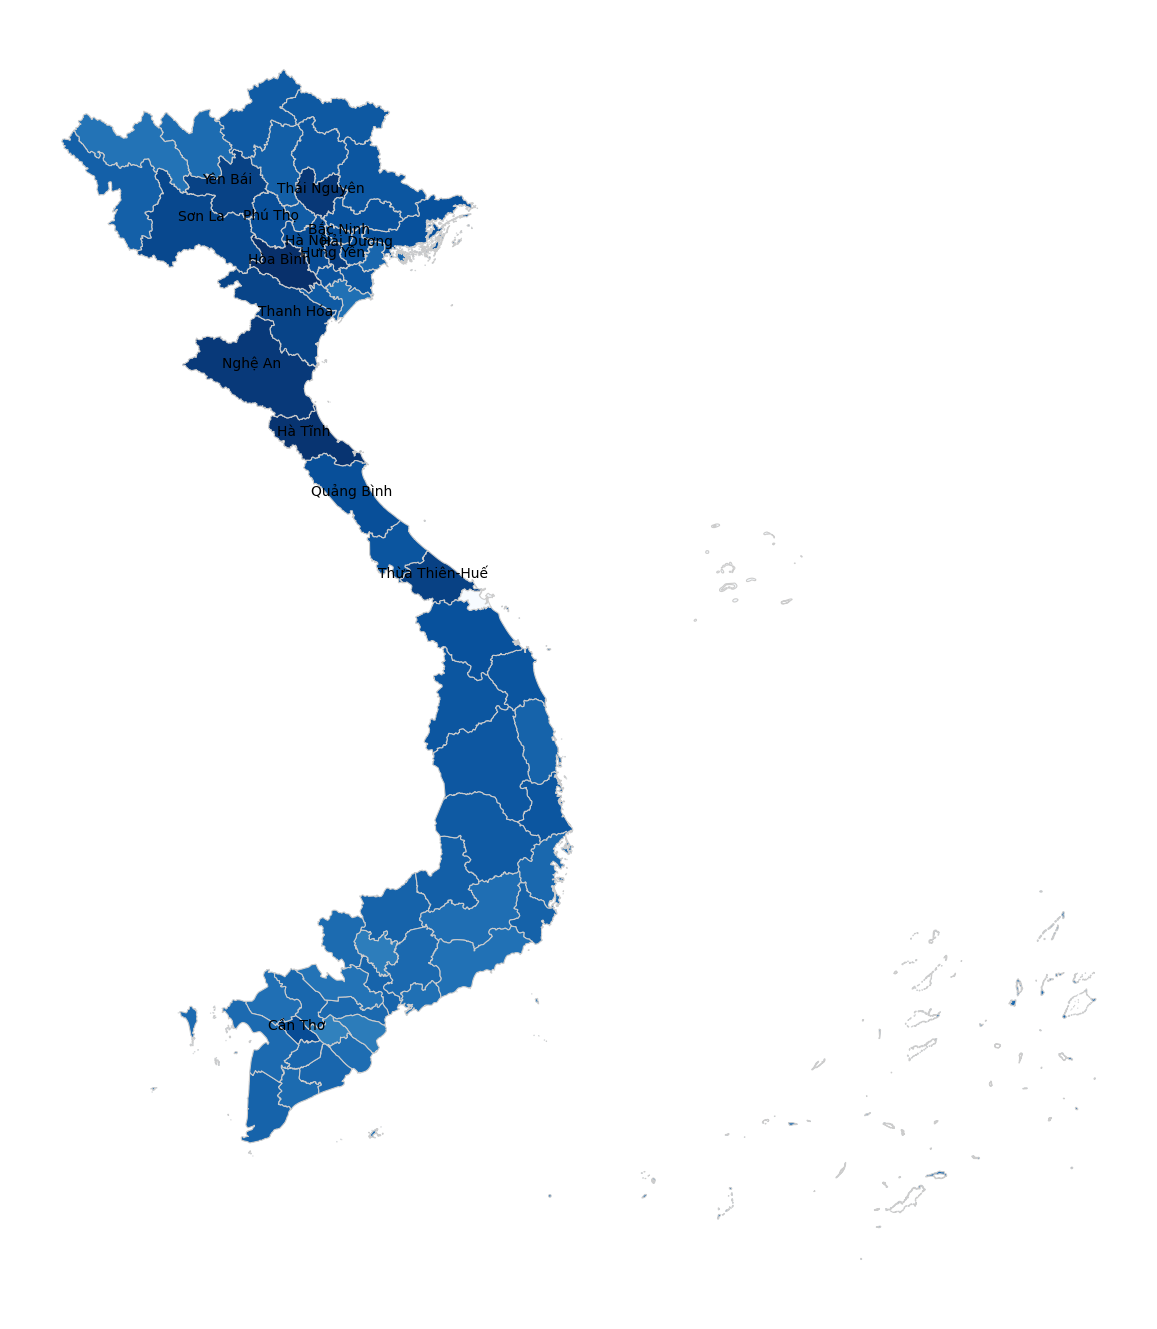

In [ ]:
draw_map('sinh_hoc_avg')
draw_map('sinh_hoc_>=9')
draw_map('sinh_hoc_std')

## ------------------------------------------------------------------------------------------
## ----------------------------------------- Lịch sử ----------------------------------------
## ------------------------------------------------------------------------------------------

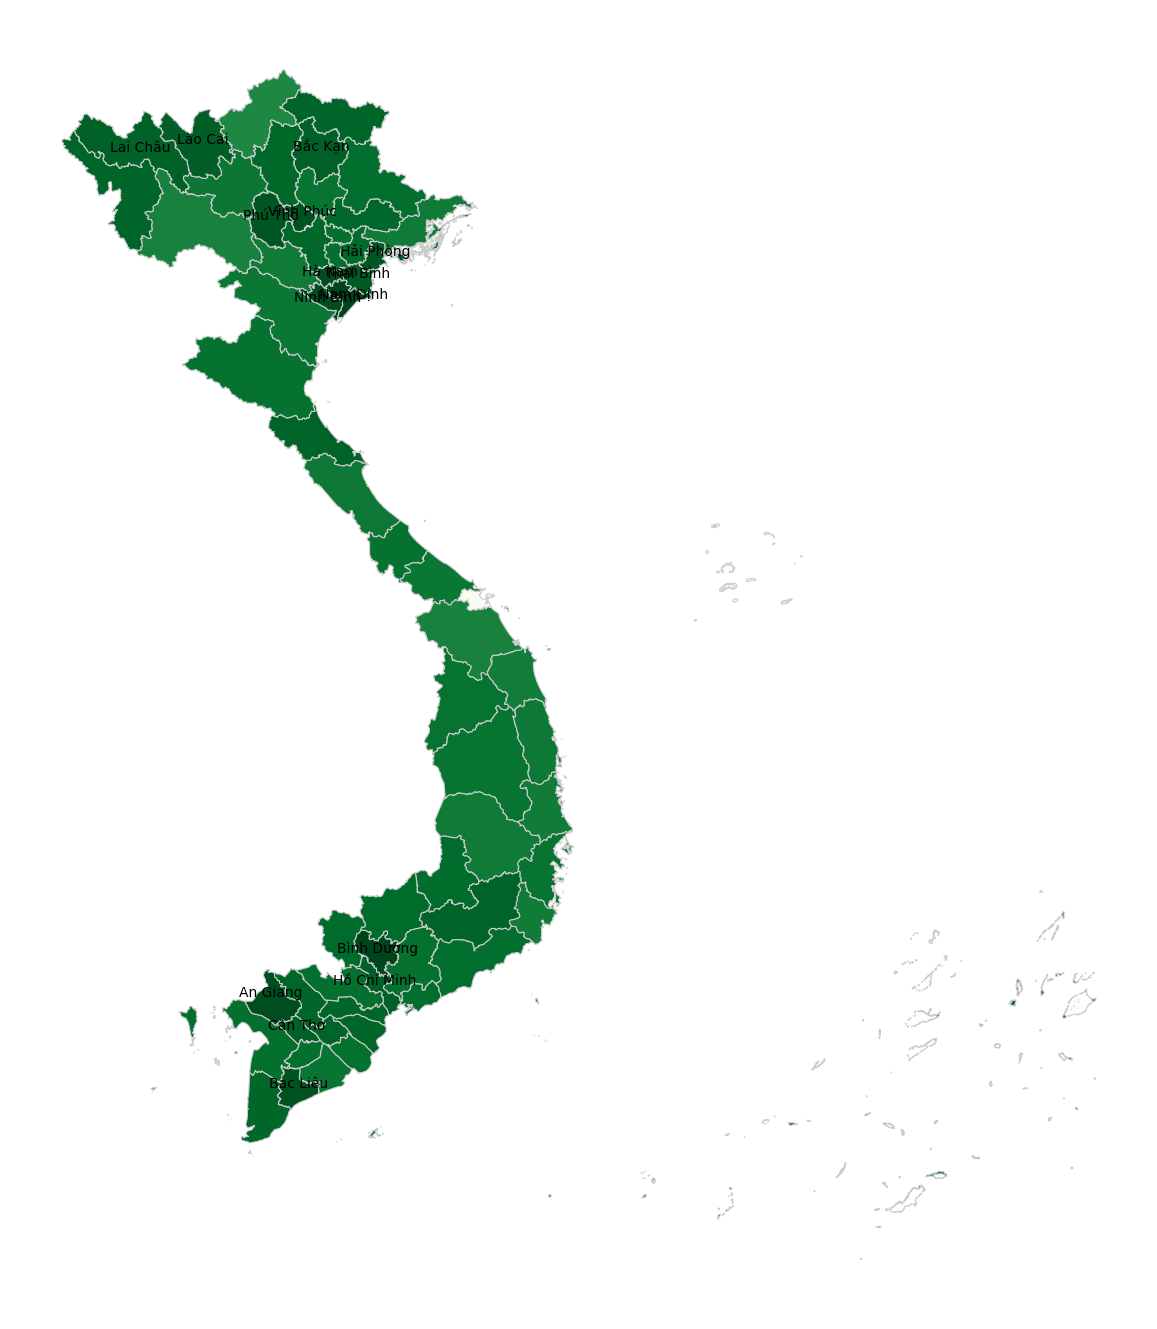

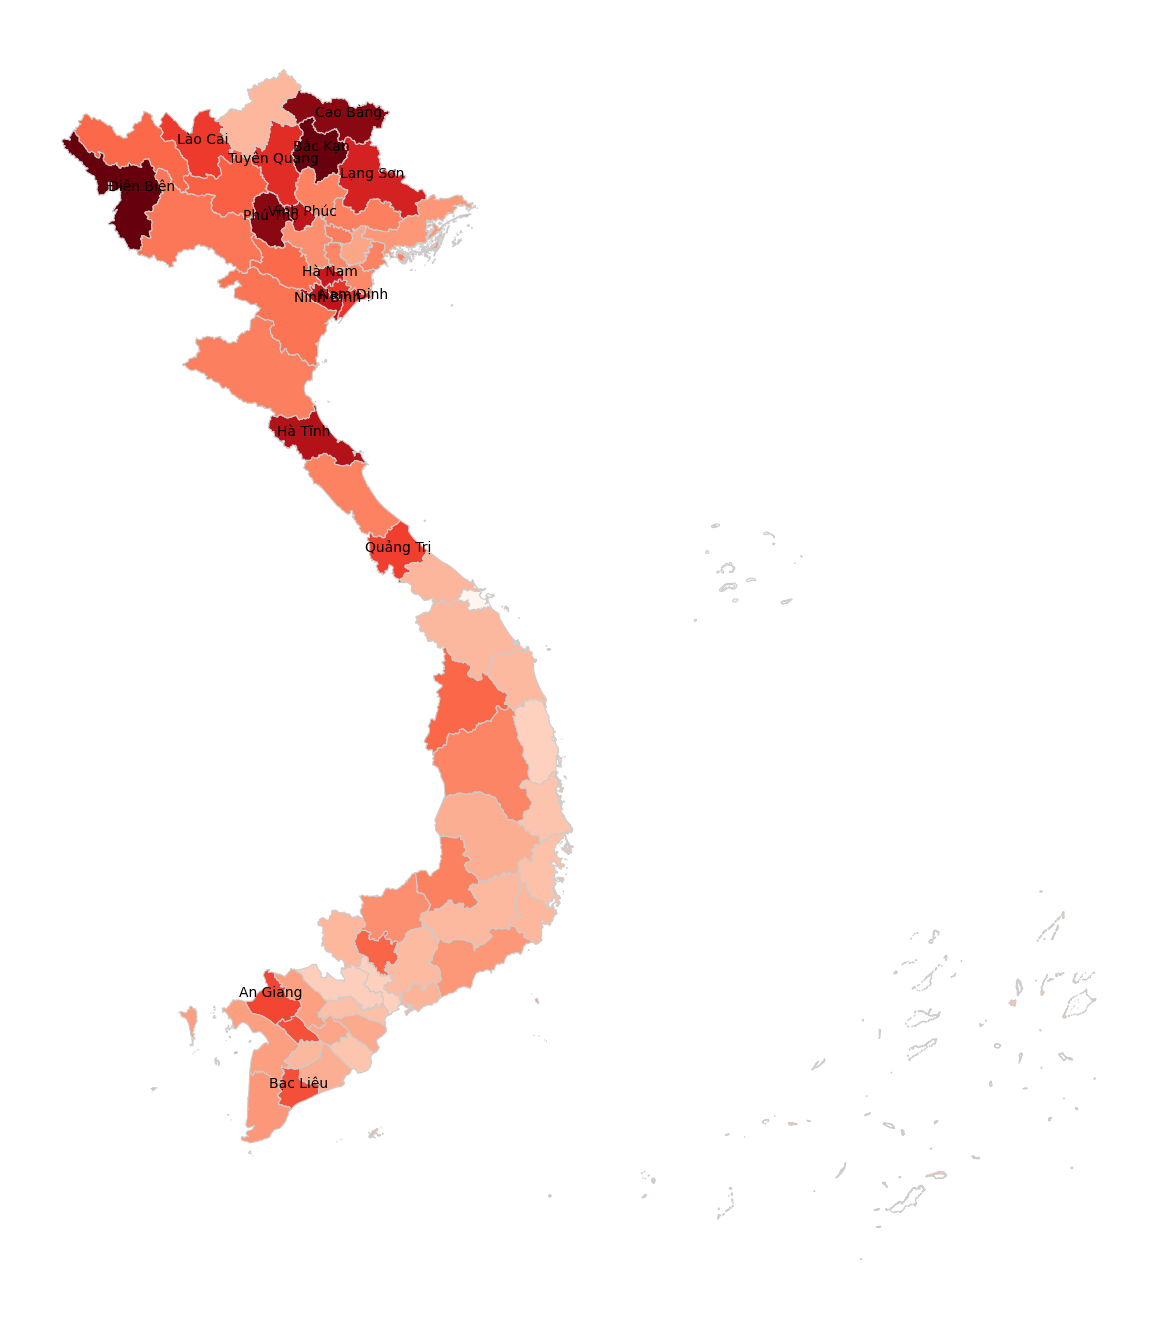

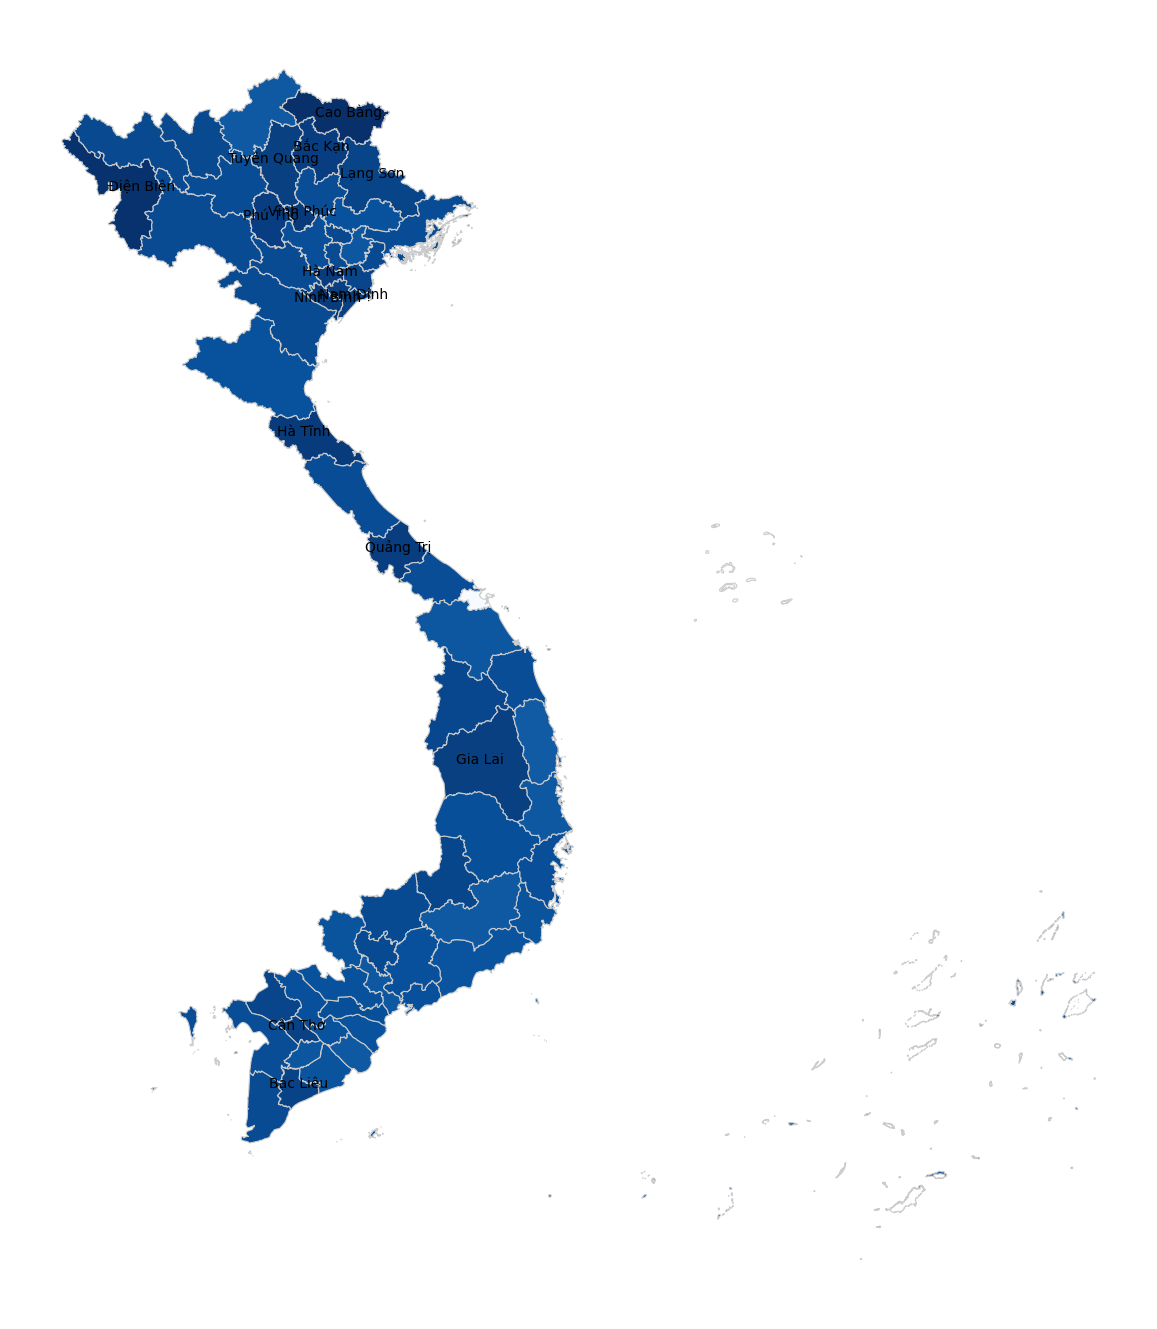

In [ ]:
draw_map('lich_su_avg')
draw_map('lich_su_>=9')
draw_map('lich_su_std')

## ------------------------------------------------------------------------------------------
## ------------------------------------------ Địa lý -----------------------------------------
## ------------------------------------------------------------------------------------------

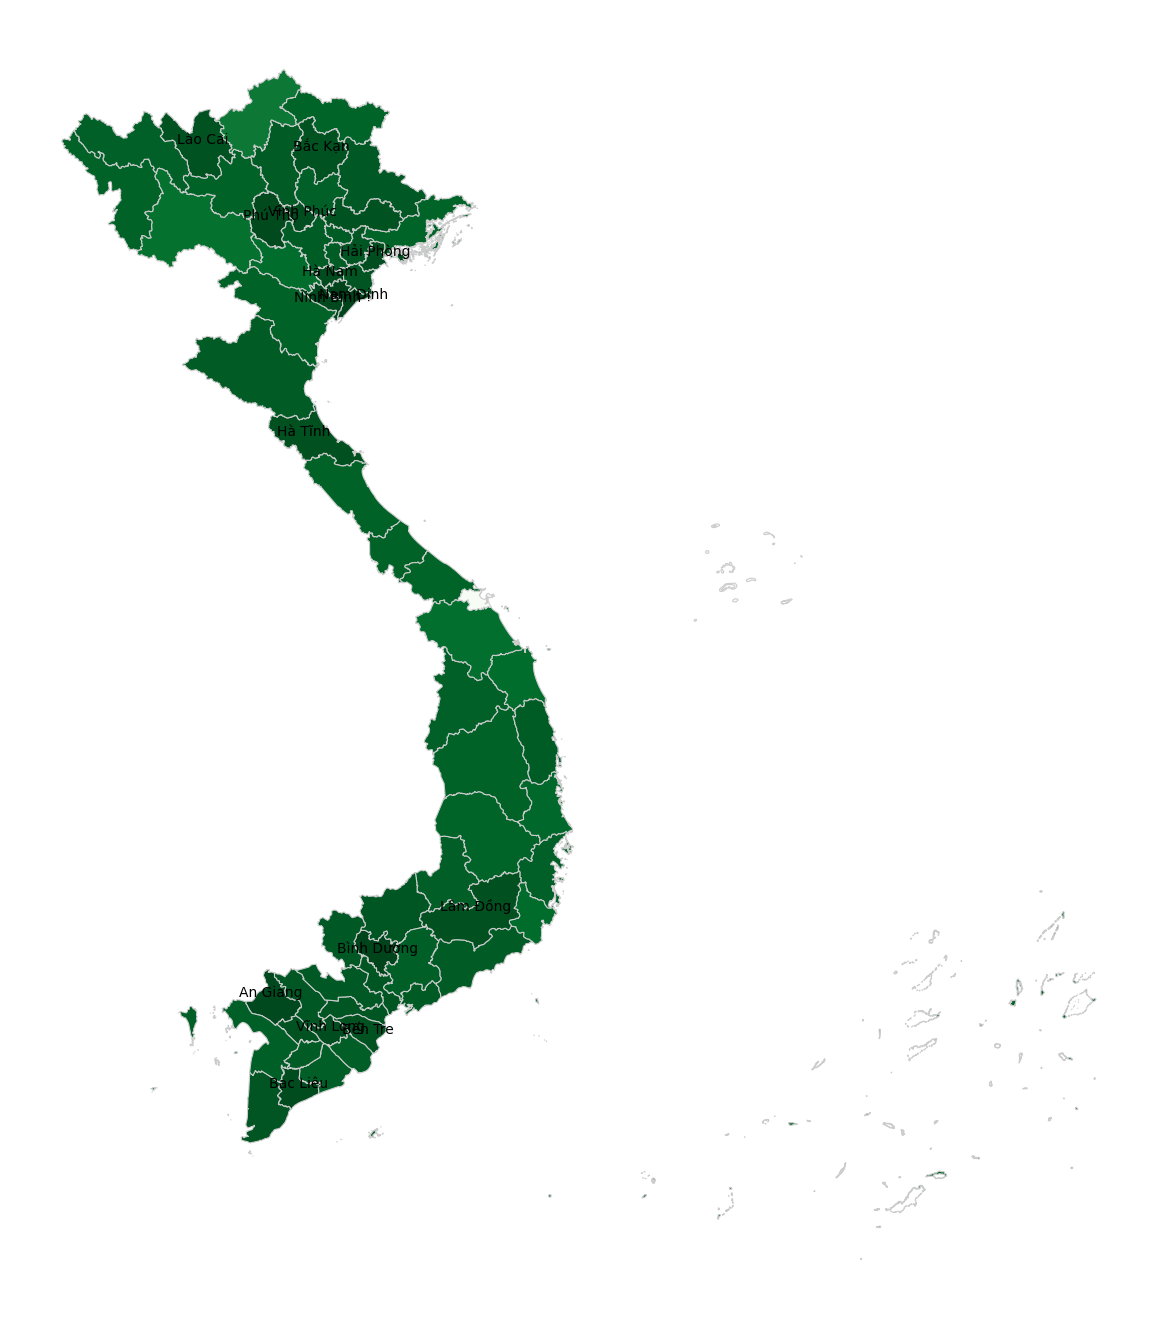

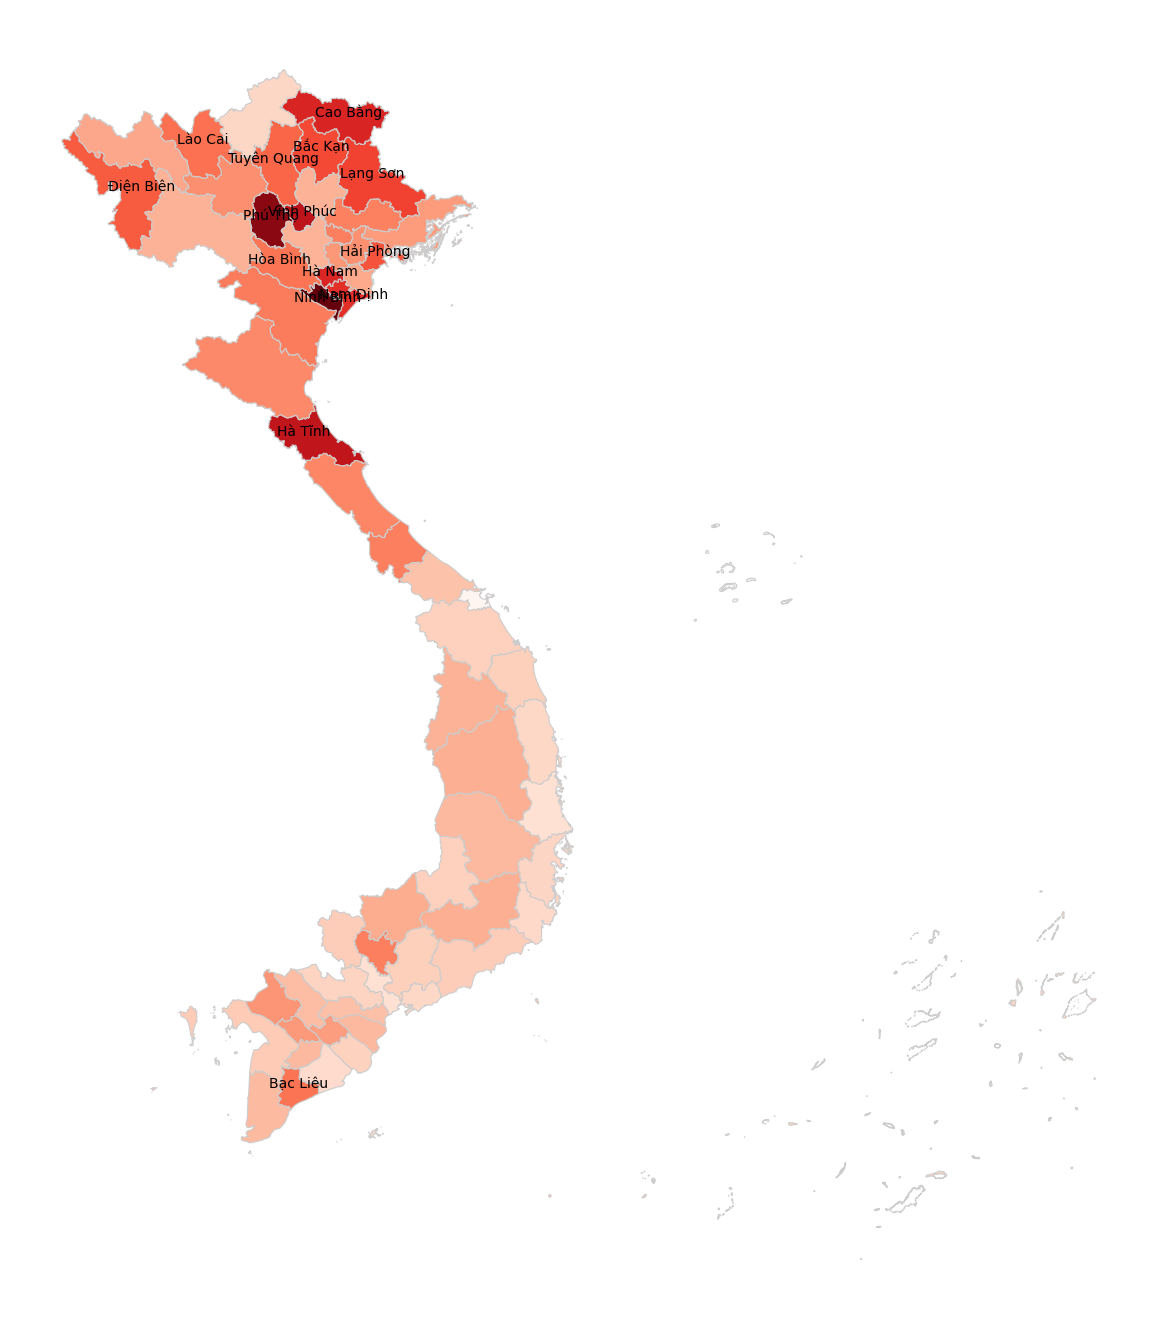

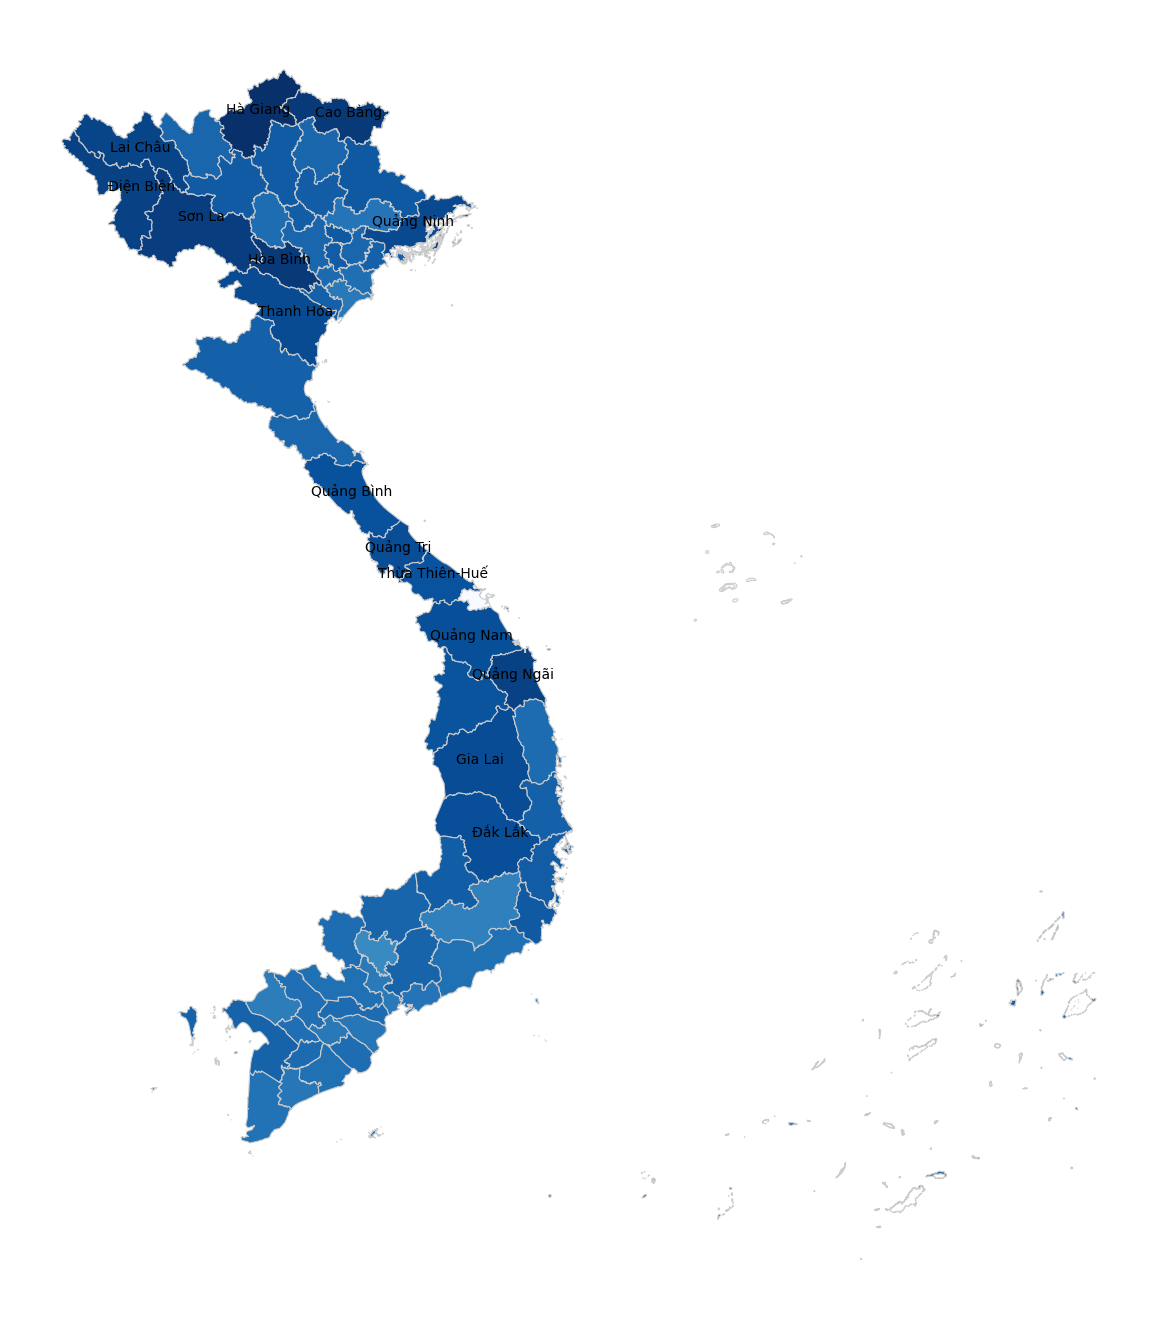

In [ ]:
draw_map('dia_ly_avg')
draw_map('dia_ly_>=9')
draw_map('dia_ly_std')

## ------------------------------------------------------------------------------------------
## ------------------------------------------ GDCD ----------------------------------------
## ------------------------------------------------------------------------------------------

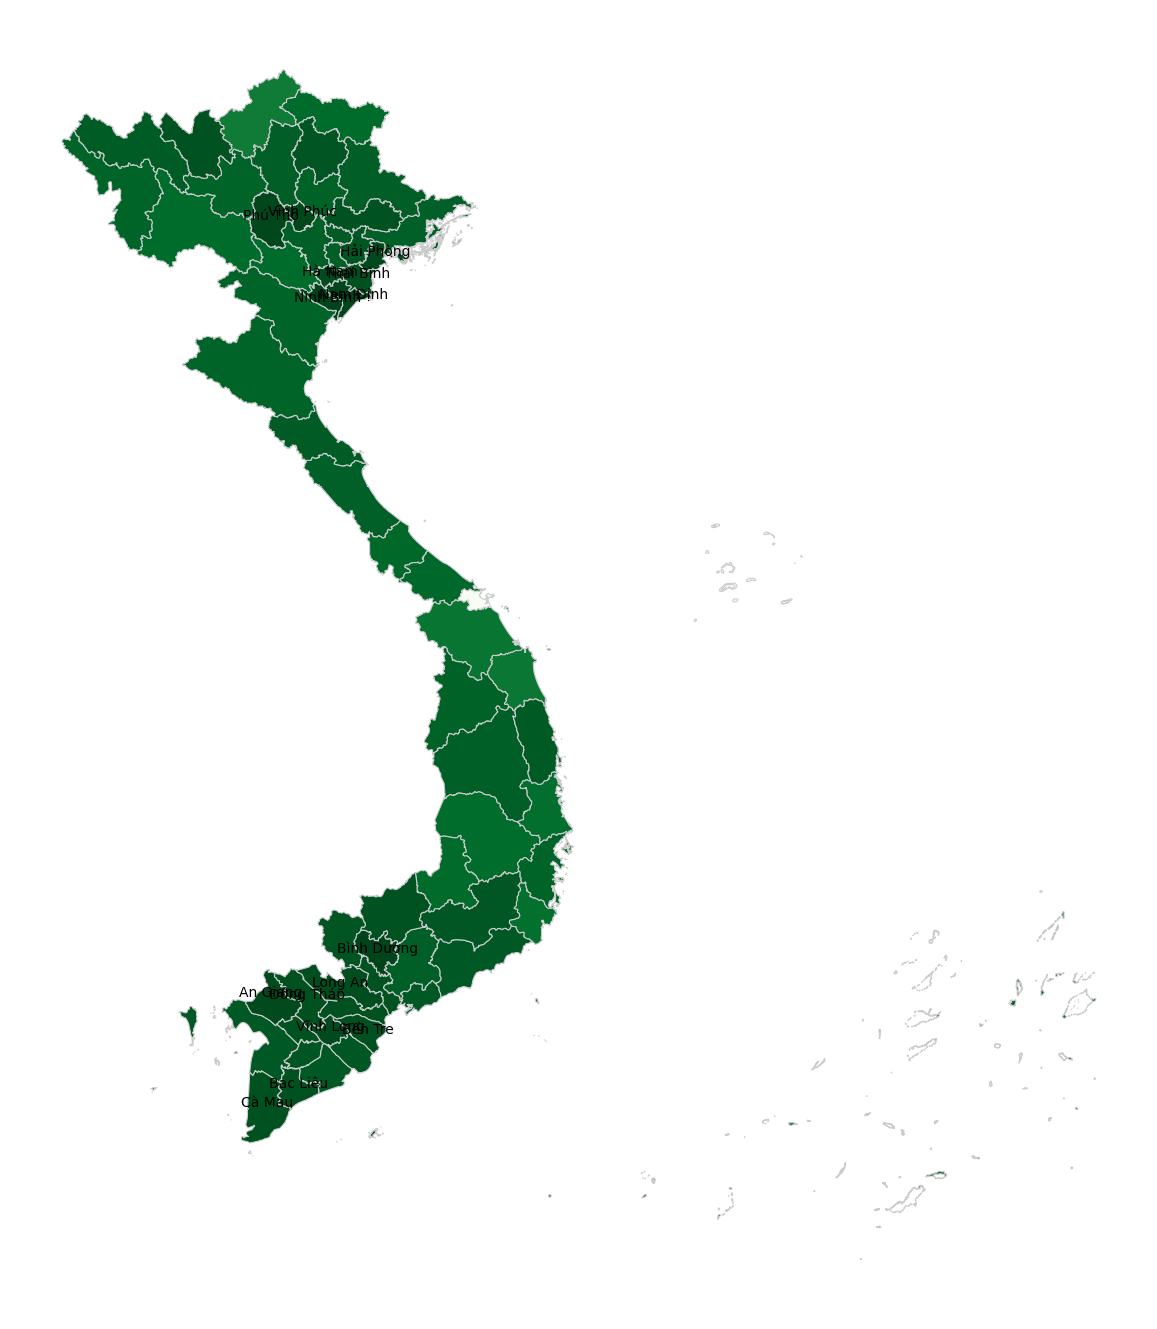

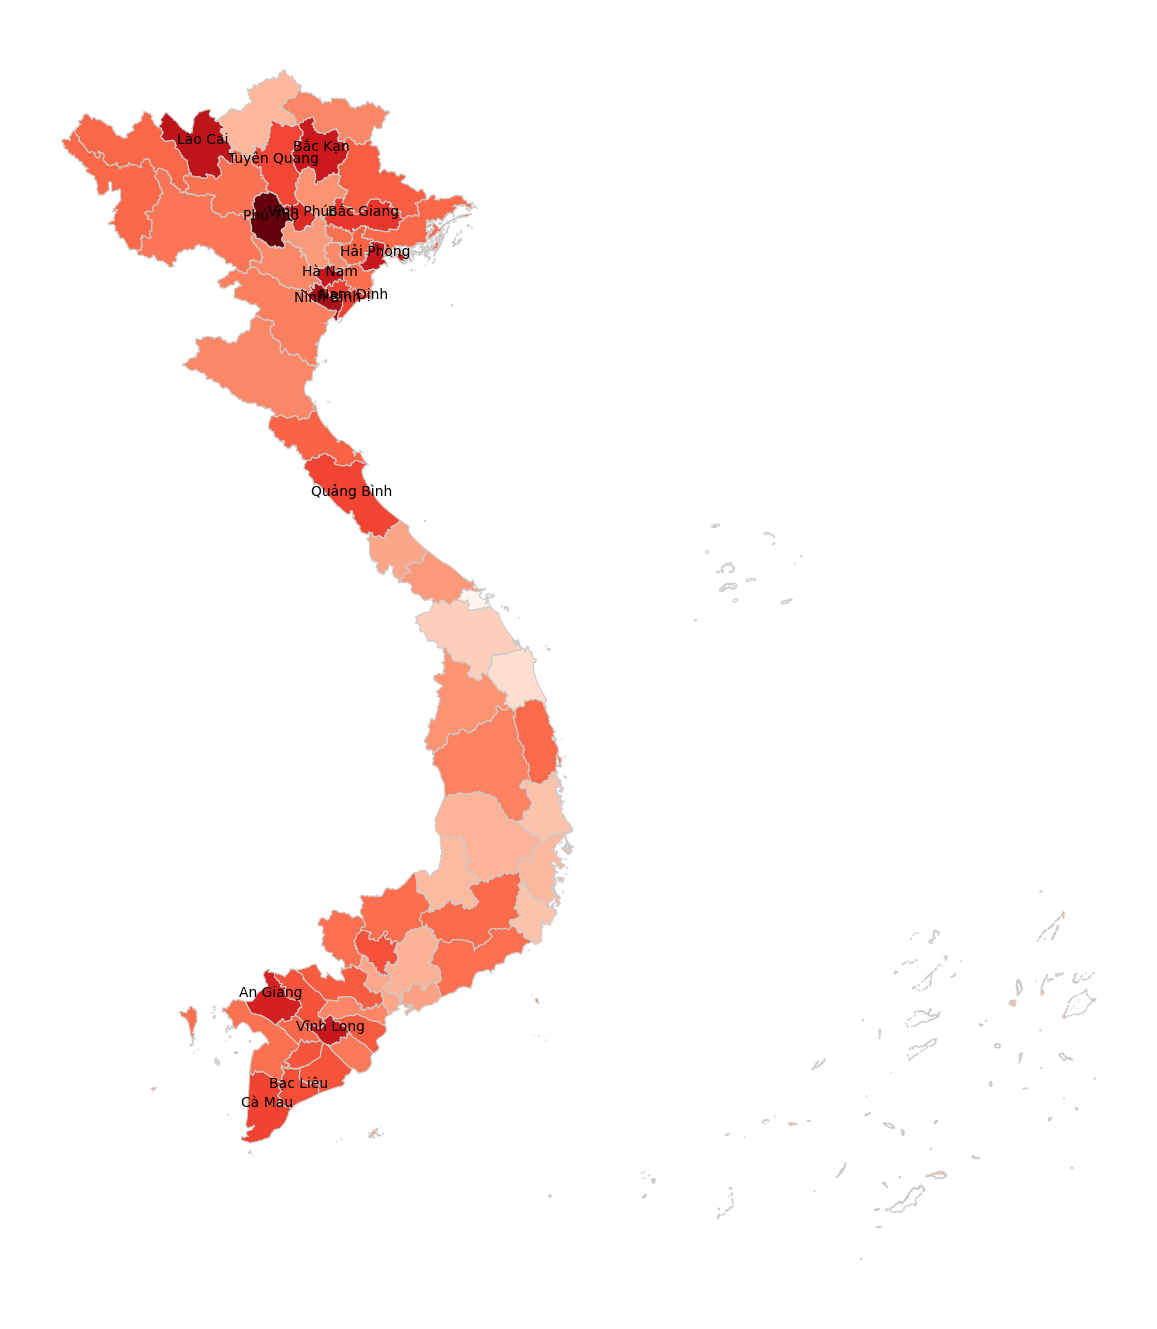

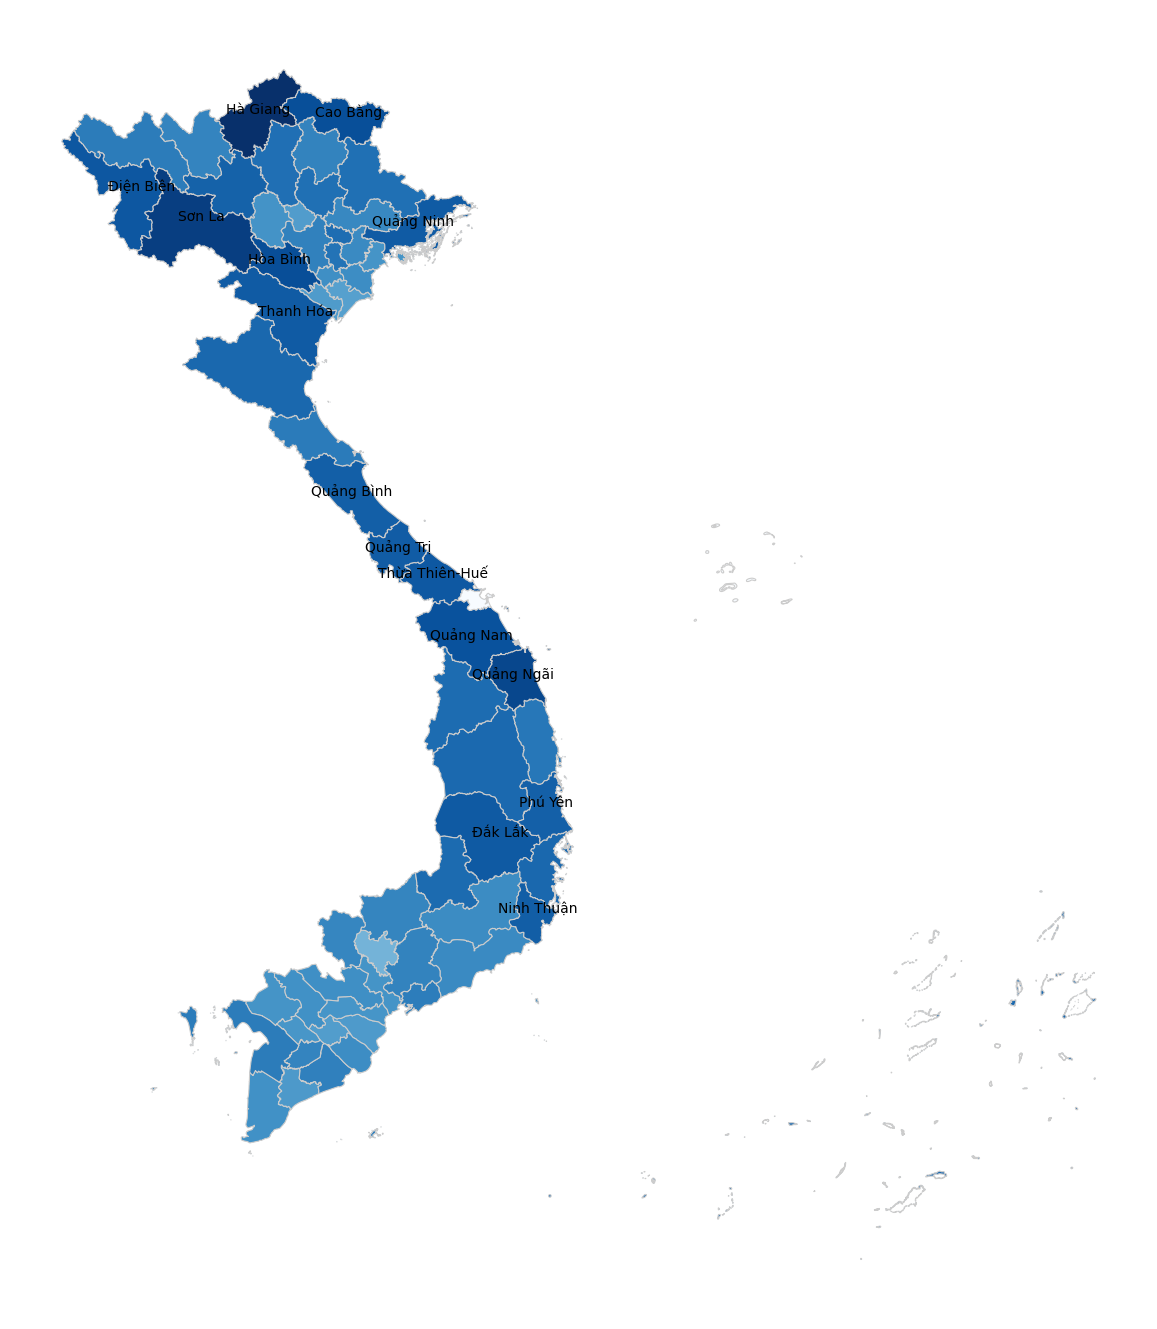

In [ ]:
draw_map('gdcd_avg')
draw_map('gdcd_>=9')
draw_map('gdcd_std')

# Mỗi quan hệ giữa điểm thi với GRDP

In [ ]:
map_df.head()

gid  code    ten_tinh                                           geometry  \
21   22  AD01    Hà Giang  MULTIPOLYGON (((105.32929 23.38417, 105.33323 ...   
50   51  AD01      Sơn La  MULTIPOLYGON (((103.55201 22.02379, 103.55384 ...   
46   47  AD01  Quảng Ngãi  MULTIPOLYGON (((109.13984 15.37755, 109.13737 ...   
28   29  AD01    Hòa Bình  MULTIPOLYGON (((104.92032 21.07708, 104.92034 ...   
13   14  AD01    Cao Bằng  MULTIPOLYGON (((105.56411 23.11317, 105.56613 ...   

    toan_avg  toan_std  toan_>=9  ngu_van_avg  ngu_van_std  ngu_van_>=9  ...  \
21  4.503645  1.963425  0.015106     5.218305     1.498631     0.002310  ...   
50  4.756197  1.821597  0.013160     5.724795     1.305479     0.001376  ...   
46  6.582313  1.953059  0.072121     6.226465     1.429152     0.007772  ...   
28  4.927926  2.015065  0.029833     5.823531     1.356156     0.001311  ...   
13  5.105441  1.956345  0.020661     5.730562     1.477913     0.005002  ...   

    lich_su_avg  lich_su_std  lich_su_>=9  dia_ly_avg  dia_ly_std  dia_ly_>=9  \
21     4.533765     1.487366     0.009241    6.011622    1.421673    0.005509   
50     4.676103     1.584600     0.016085    6.254644    1.348149    0.009806   
46     4.796426     1.568691     0.008942    6.354815    1.324084    0.006351   
28     4.835402     1.583142     0.017375    6.355168    1.366985    0.016392   
13     5.304866     1.764709     0.032405    6.600994    1.364612    0.024793   

    gdcd_avg  gdcd_std  gdcd_>=9                                    coords  
21  7.174921  1.440721  0.082815   (104.9578486733987, 22.780824260500054)  
50  7.688844  1.356476  0.146052  (104.13608637656193, 21.303046007500058)  
46  7.306037  1.314543  0.042621  (108.60175745768655, 14.980173040500052)  
28  7.692140  1.274366  0.129385    (105.2555005325251, 20.71056731400005)  
13  7.690044  1.267227  0.129187  (106.25456762826224, 22.739175004500023)  

[5 rows x 32 columns]

In [ ]:
# Data GRDP
data_grdp = pd.read_excel('C:\\Users\\ADMIN\\Repo\\Data_analysis\\chi_so_cac_tinh.xlsx', sheet_name='GRDP')
data_grdp.head(2)
# map_df.drop(columns=['GRDP bình quân đầu người (USD)_x', 'GRDP bình quân đầu người (USD)_y', 'Tên tỉnh, thành phố_x', 'Tên tỉnh, thành phố_y'], inplace=True)
map_df = map_df.merge(data_grdp, how='left', left_on='ten_tinh', right_on='Tên tỉnh, thành phố')
map_df.head(2)


gid  code  ten_tinh                                           geometry  \
0   22  AD01  Hà Giang  MULTIPOLYGON (((105.32929 23.38417, 105.33323 ...   
1   51  AD01    Sơn La  MULTIPOLYGON (((103.55201 22.02379, 103.55384 ...   

   toan_avg  toan_std  toan_>=9  ngu_van_avg  ngu_van_std  ngu_van_>=9  ...  \
0  4.503645  1.963425  0.015106     5.218305     1.498631     0.002310  ...   
1  4.756197  1.821597  0.013160     5.724795     1.305479     0.001376  ...   

   lich_su_>=9  dia_ly_avg  dia_ly_std  dia_ly_>=9  gdcd_avg  gdcd_std  \
0     0.009241    6.011622    1.421673    0.005509  7.174921  1.440721   
1     0.016085    6.254644    1.348149    0.009806  7.688844  1.356476   

   gdcd_>=9                                    coords  Tên tỉnh, thành phố  \
0  0.082815   (104.9578486733987, 22.780824260500054)               Hà Giang   
1  0.146052  (104.13608637656193, 21.303046007500058)                 Sơn La   

   GRDP bình quân đầu người (USD)  
0                             899  
1                             165  

[2 rows x 34 columns]

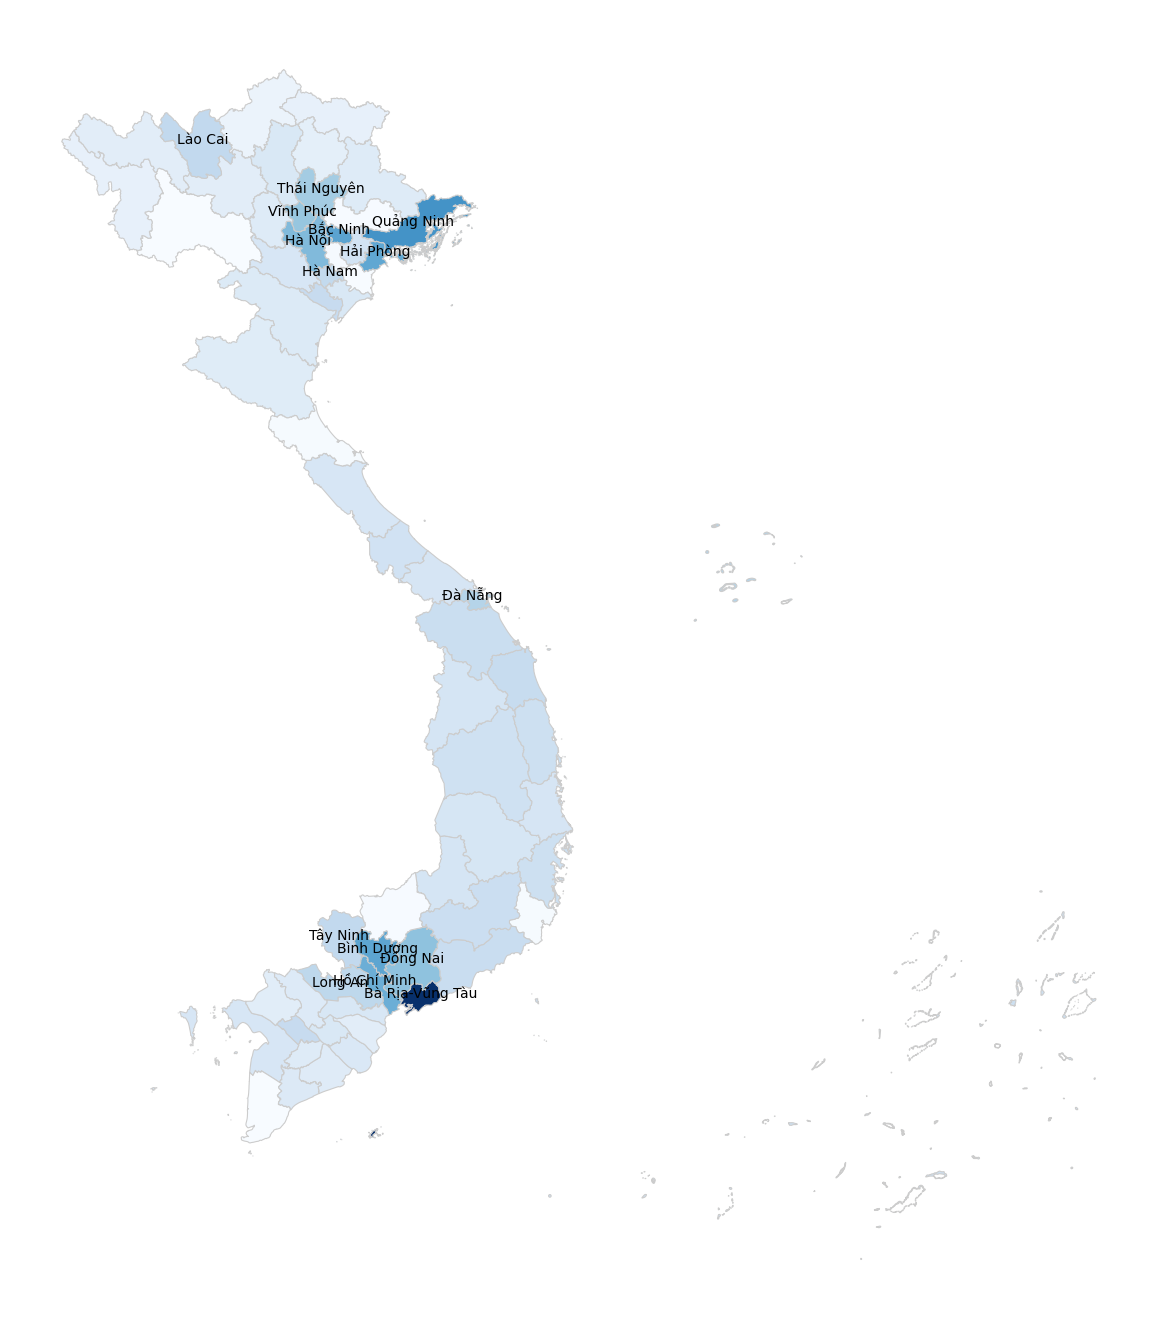

In [ ]:
draw_map('GRDP bình quân đầu người (USD)')